In [18]:
# pandas, numpy 라이브러리 로드하기

import pandas as pd
import numpy as np

In [19]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
#seoul_covid_9_30_.csv
file_name = f"seoul_covid_10_31_.csv"
file_name

'seoul_covid_10_31_.csv'

In [20]:
# read_csv 로 csv 파일을 불러와 주세요.
df = pd.read_csv(file_name, encoding="utf-8")
df.shape

(6056, 7)

In [6]:
# "연번"을 기준으로 역순으로 정렬합니다.

df = df.sort_values(by="연번", ascending=False)

In [7]:
# head 로 미리보기를 합니다.

df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6056,26629,10.31.,서초구,-,기타확진자 접촉,NaN
1,6055,26618,10.31.,구로구,-,강남구 헬스장 관련,NaN
2,6054,26616,10.31.,서초구,-,종로구 고등학교 관련,NaN
3,6053,26617,10.31.,용산구,-,종로구 고등학교 관련,NaN
4,6052,26613,10.31.,은평구,-,기타확진자 접촉,NaN


In [8]:
# tail 로 미리보기를 합니다.

df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
6051,5,9,1.31.,성북구,-,#5 접촉,퇴원
6052,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
6053,3,6,1.30.,종로구,-,#3 접촉,퇴원
6054,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
6055,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


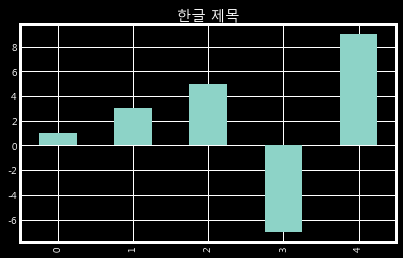

In [21]:
%matplotlib inline
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
#plt.rc("font", family="AppleGothic")
#plt.rc("axes", unicode_minus=False)

# 그래프 스타일 ggplot, fivethirtyeight, dark_background
plt.style.use("dark_background")

pd.Series([1, 3, 5, -7, 9]).plot.bar(title="한글 제목")

### 시각화 선명하게 설정하기

In [22]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 확진일

In [287]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.

df["확진일"].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
4.15.      1
2.6.       1
5.31.      1
2.7.       1
5.01.      1
Name: 확진일, Length: 229, dtype: int64

In [288]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df["확진일"].head(1)

0    10.06.
Name: 확진일, dtype: object

In [23]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime("2020-"+ df["확진일"].str.replace(".", "-"))
df[["확진일", "확진일자"]].head()

,확진일,확진일자
0,10.31.,2020-10-31
1,10.31.,2020-10-31
2,10.31.,2020-10-31
3,10.31.,2020-10-31
4,10.31.,2020-10-31


In [24]:
# 월만 추출합니다.

df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].tail()

,확진일,확진일자,월
6051,1.31.,2020-01-31,1
6052,1.30.,2020-01-30,1
6053,1.30.,2020-01-30,1
6054,1.30.,2020-01-30,1
6055,1.24.,2020-01-24,1


In [25]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

,확진일,확진일자,월,주
0,10.31.,2020-10-31,10,44
1,10.31.,2020-10-31,10,44
2,10.31.,2020-10-31,10,44
3,10.31.,2020-10-31,10,44
4,10.31.,2020-10-31,10,44


선그래프 그리기
Visualization — pandas documentation[https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html]

In [26]:
df["확진일자"].value_counts().sort_index()

2020-01-24     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
              ..
2020-10-27    31
2020-10-28    31
2020-10-29    52
2020-10-30    46
2020-10-31    45
Name: 확진일자, Length: 253, dtype: int64

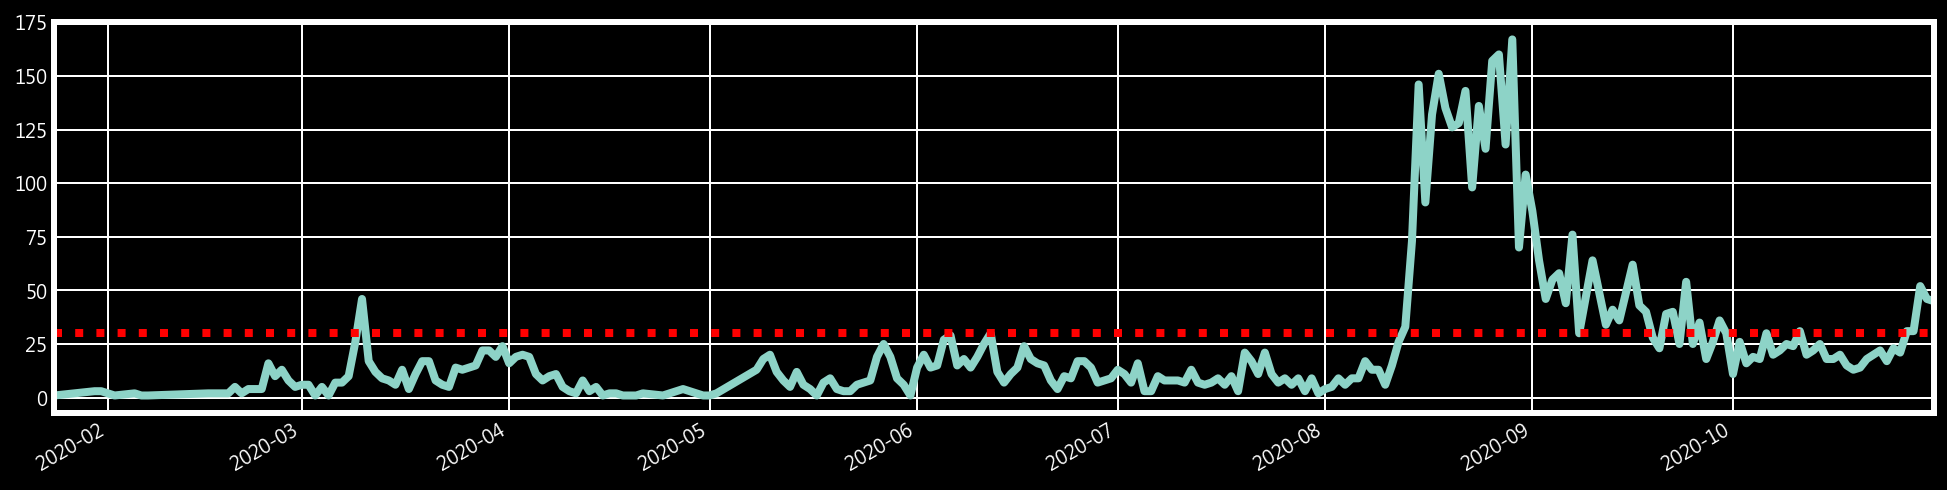

In [27]:
# 확진일자로 선그래프를 그립니다.

df["확진일자"].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color="red", linestyle=":")

### 선그래프에 값 표시하기

In [294]:
df["확진일자"].head()

0   2020-10-06
1   2020-10-06
2   2020-10-06
3   2020-10-06
4   2020-10-06
Name: 확진일자, dtype: datetime64[ns]

In [295]:
"2020-09-30"[-5:]

'09-30'

In [28]:
df["확진일자"].astype(str).map(lambda x : x[-5:])

0       10-31
1       10-31
2       10-31
3       10-31
4       10-31
        ...  
6051    01-31
6052    01-30
6053    01-30
6054    01-30
6055    01-24
Name: 확진일자, Length: 6056, dtype: object

In [49]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,6056,26629,10.31.,서초구,-,기타확진자 접촉,NaN,2020-10-31,10,44,10-31
1,6055,26618,10.31.,구로구,-,강남구 헬스장 관련,NaN,2020-10-31,10,44,10-31
2,6054,26616,10.31.,서초구,-,종로구 고등학교 관련,NaN,2020-10-31,10,44,10-31


In [30]:
day_count = df["월일"].value_counts().sort_index()
print(day_count[2])
day_count.iloc[2]

3


3

In [31]:
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        print(i, case_count)

27 26
28 46
46 22
47 22
49 24
95 25
104 27
105 29
110 25
111 30
116 24
149 21
152 21
172 26
173 33
174 73
175 146
176 91
177 132
178 151
179 135
180 126
181 128
182 143
183 98
184 136
185 116
186 157
187 160
188 118
189 167
190 70
191 104
192 87
193 64
194 46
195 55
196 58
197 44
198 76
199 30
200 47
201 64
202 49
203 34
204 41
205 36
206 49
207 62
208 43
209 40
210 28
211 23
212 39
213 40
214 25
215 54
216 25
217 35
219 26
220 36
221 30
223 26
227 30
229 22
230 25
231 24
232 31
234 22
235 25
244 22
246 23
247 21
248 31
249 31
250 52
251 46
252 45


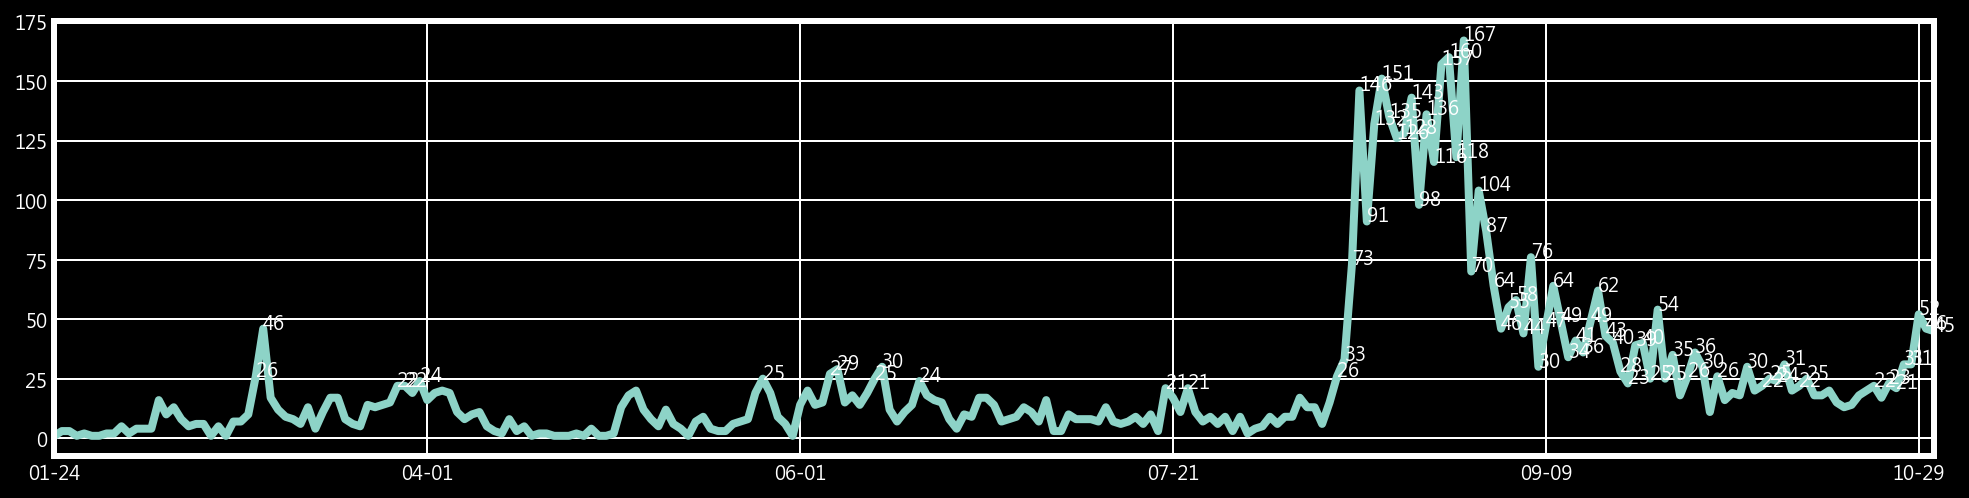

In [32]:
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)

### 확진자가 가장 많이 나온 날

In [33]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
10-27    31
10-28    31
10-29    52
10-30    46
10-31    45
Name: 월일, Length: 253, dtype: int64

In [34]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.

day_count.describe()

count    253.000000
mean      23.936759
std       32.280700
min        1.000000
25%        6.000000
50%       14.000000
75%       25.000000
max      167.000000
Name: 월일, dtype: float64

In [35]:
# 확진자가 가장 많았던 날을 찾습니다.

day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [36]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.

df[df["월일"] == "08-29"].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
2143,3913,20100,8.29.,관악구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
2178,3878,19716,8.29.,동작구,-,성북구 사랑제일교회 관련,퇴원,2020-08-29,8,35,08-29
2205,3851,19830,8.29.,구로구,-,영등포구 권능교회,퇴원,2020-08-29,8,35,08-29
2206,3850,19849,8.29.,노원구,-,노원구 빛가온교회 관련,퇴원,2020-08-29,8,35,08-29
2207,3849,19898,8.29.,금천구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29


### 막대그래프 그리기

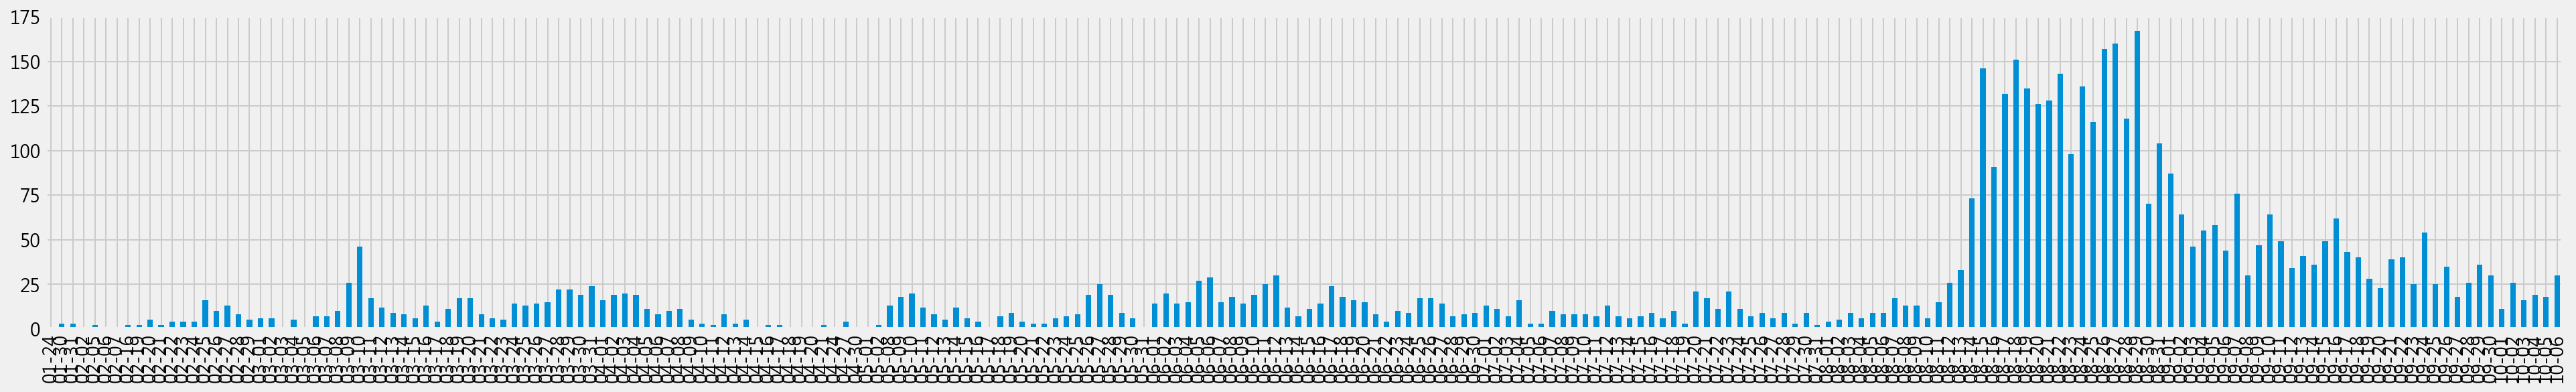

In [305]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.

day_count.plot.bar(figsize=(30, 4))

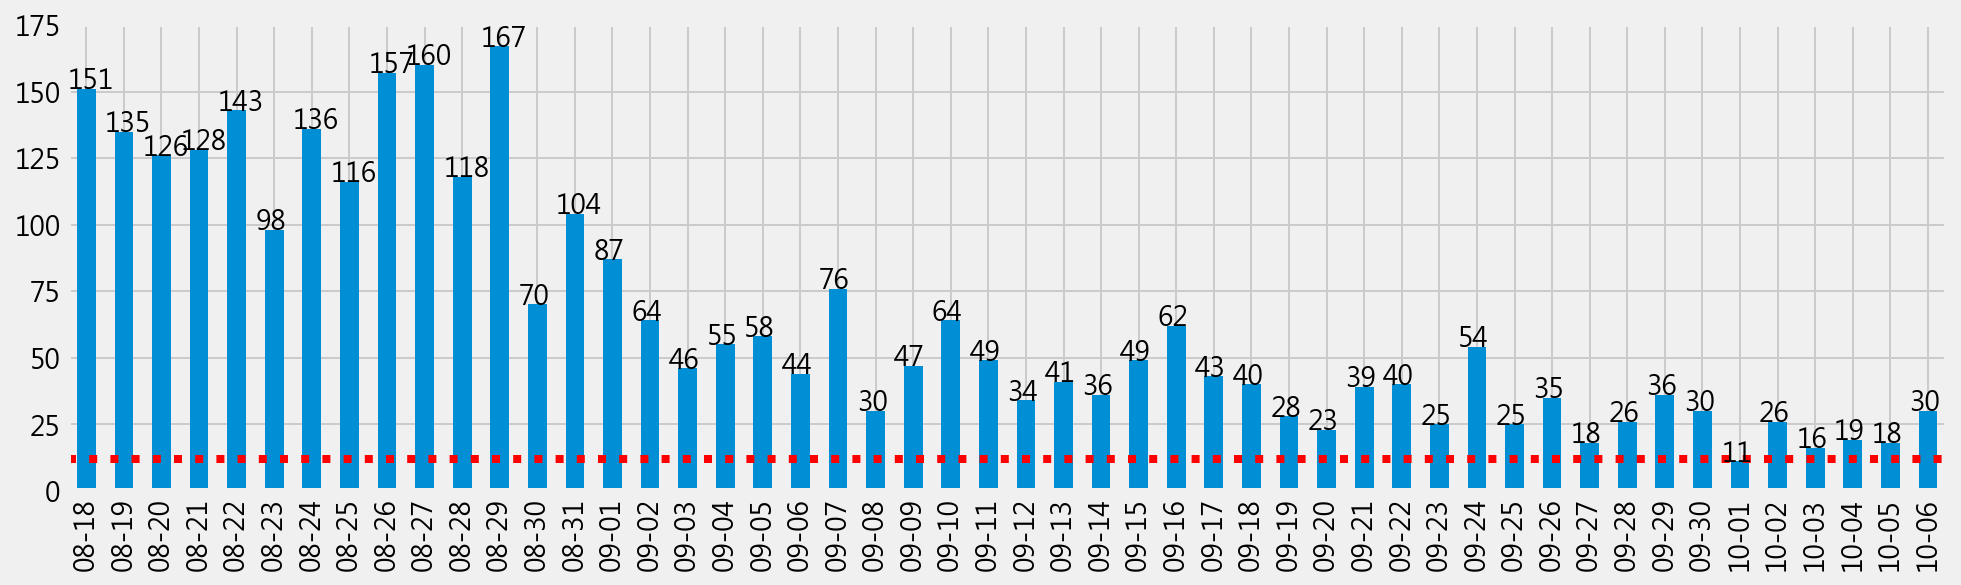

In [306]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

g = day_count[-50:].plot.bar(figsize=(15, 4))
g.axhline(day_count.median(), linestyle=":", color="red")
for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

### 월별 확진자 수 그리기

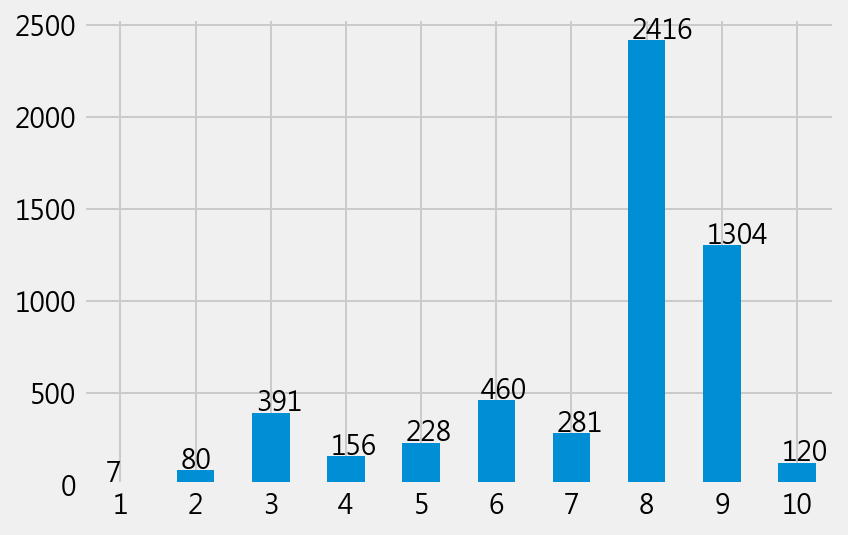

In [307]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

### 주단위 확진자수 그리기

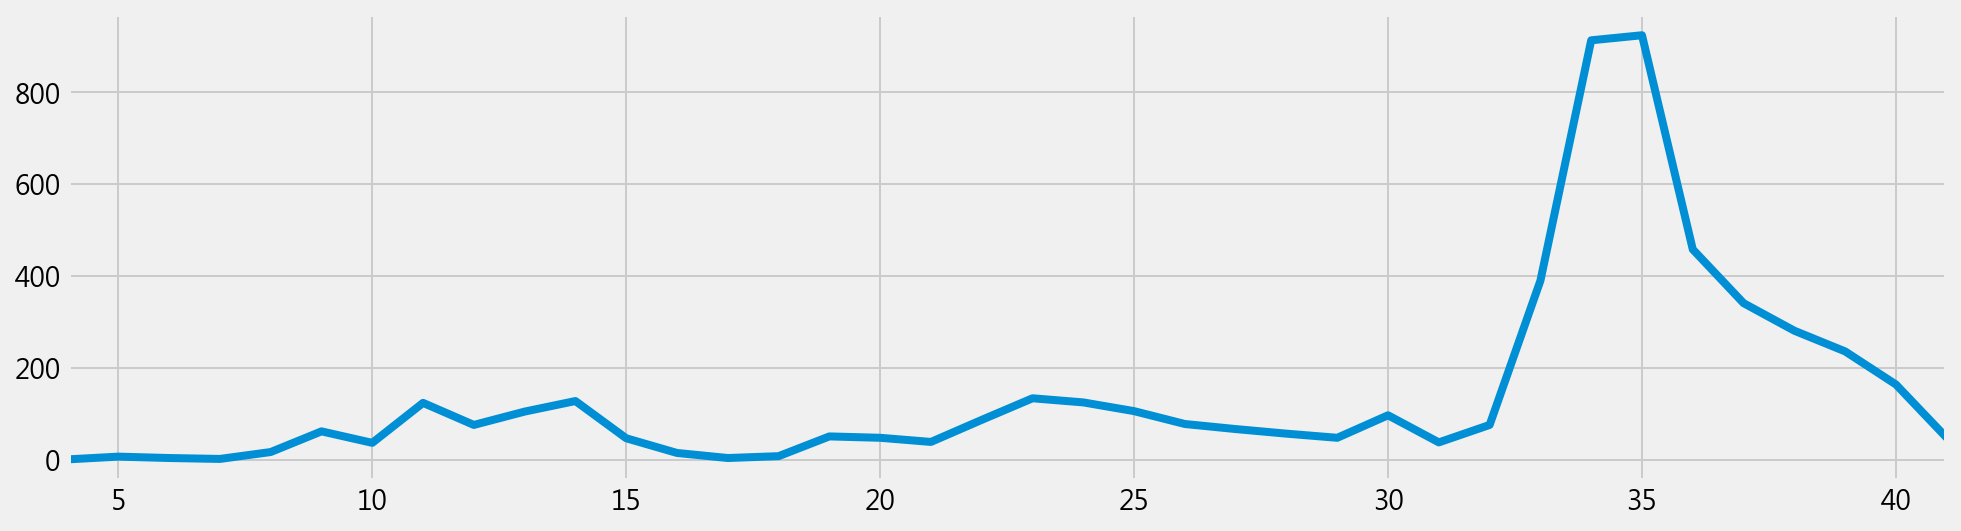

In [308]:
# 주별로 빈도수를 구합니다.

weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15, 4))

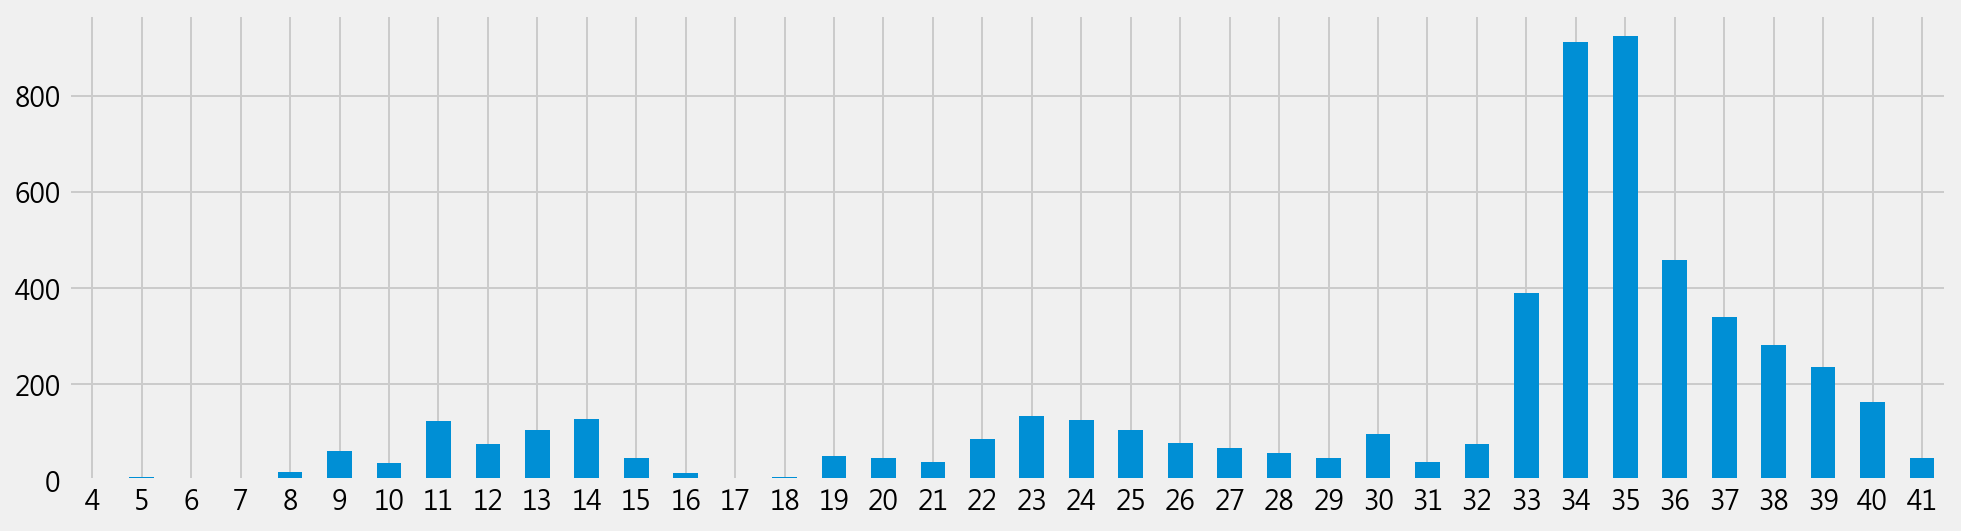

In [309]:
# 주단위 빈도수 막대그래프로 그리기
weekly_case.plot.bar(figsize=(15, 4), rot=0)

### 월-주 함께 그리기

In [310]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 계산합니다.

month_weekly_case = df.groupby(["월", "주"])["연번"].count()
month_weekly_case

월   주 
1   4       1
    5       6
2   5       1
    6       4
    7       2
    8      17
    9      56
3   9       6
    10     37
    11    124
    12     76
    13    105
    14     43
4   14     85
    15     47
    16     15
    17      4
    18      5
5   18      3
    19     51
    20     48
    21     39
    22     87
6   23    134
    24    125
    25    106
    26     78
    27     17
7   27     50
    28     57
    29     48
    30     97
    31     29
8   31      9
    32     76
    33    390
    34    913
    35    924
    36    104
9   36    354
    37    341
    38    281
    39    236
    40     92
10  40     72
    41     48
Name: 연번, dtype: int64

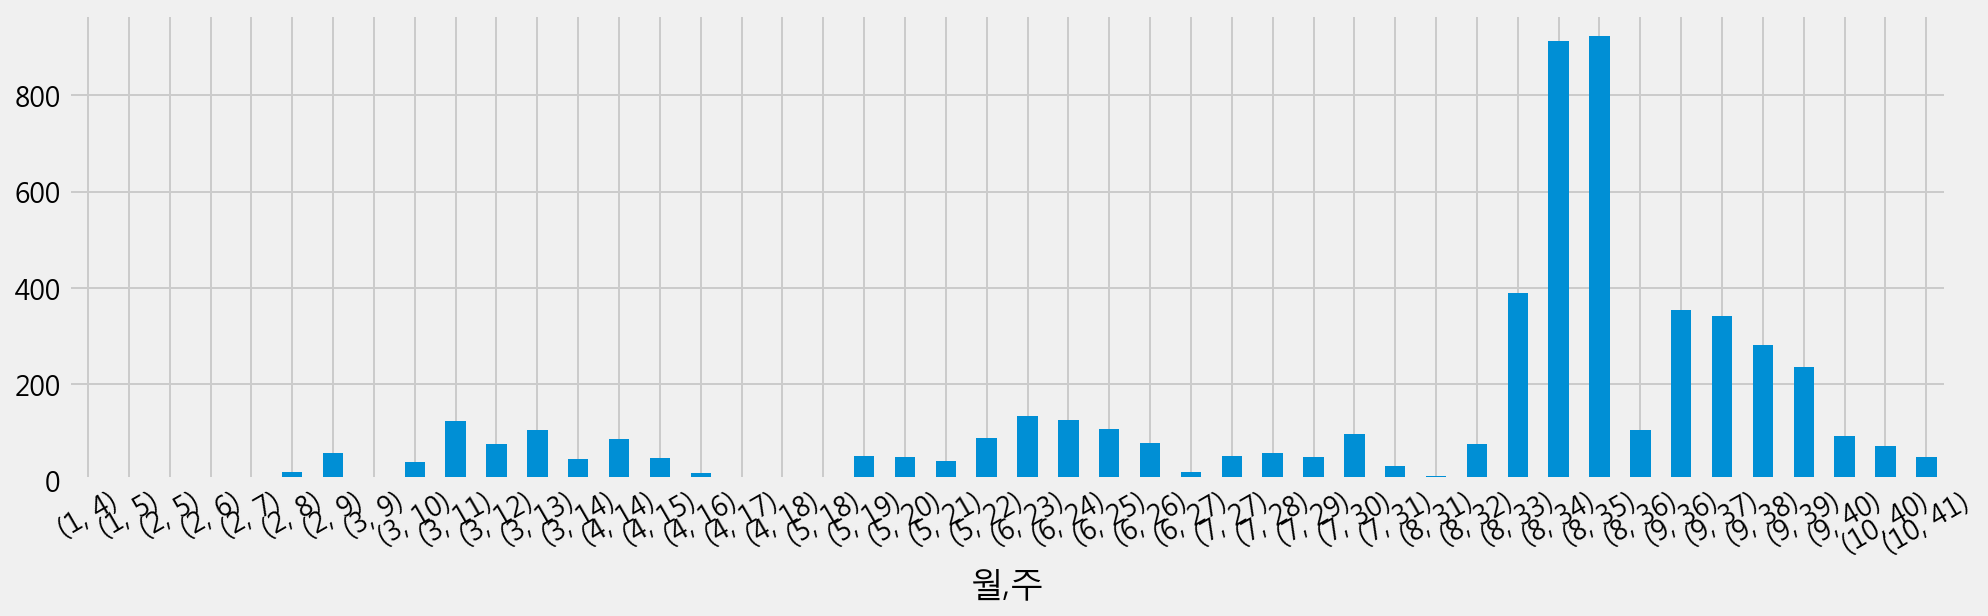

In [311]:
# 월-주 를 함께 그래프에 표현하기

month_weekly_case.plot.bar(figsize=(15, 4), rot=30)

### 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [312]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,5443,24333,10.06.,강북구,-,도봉구 다나병원,NaN,2020-10-06,10,41,10-06
1,5442,24321,10.06.,용산구,프랑스,해외 접촉 추정,NaN,2020-10-06,10,41,10-06
2,5441,24326,10.06.,강북구,-,강북구 북서울 꿈의교회,NaN,2020-10-06,10,41,10-06
3,5440,24331,10.06.,동대문구,-,기타 확진자 접촉,NaN,2020-10-06,10,41,10-06
4,5439,24330,10.06.,동대문구,-,감염경로 조사중,NaN,2020-10-06,10,41,10-06


In [40]:
#확진일자는 인덱스 7번째 칼럼, 행을 지정할때 -1은 가장 첫번재 row를 선택한다.
first_day = df.iloc[-1,7]
first_day

Timestamp('2020-01-24 00:00:00')

In [41]:
last_day = df.iloc[0, 7]
last_day

Timestamp('2020-10-31 00:00:00')

In [42]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
print(type(days))
days[:5]

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [43]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()
df_days =  pd.DataFrame({"확진일자": days})
print(df_days.shape)
df_days.head()

(282, 1)


,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [44]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts()
daily_case.head()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
Name: 확진일자, dtype: int64

In [45]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기

df_daily_case = daily_case.to_frame()
print(df_daily_case.shape)
df_daily_case.head()

(253, 1)


,확진일자
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


In [46]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기

df_daily_case.columns = ["확진수"]
df_daily_case.head()

,확진수
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [320]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
all_day = df_days.merge(df_daily_case, left_on="확진일자", right_on=df_daily_case.index, how="left")
print(all_day.shape)
all_day.head()

(257, 2)


,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


### 누적 확진자 수 구하기

In [321]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.

all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
252,2020-10-02,26.0,5360.0
253,2020-10-03,16.0,5376.0
254,2020-10-04,19.0,5395.0
255,2020-10-05,18.0,5413.0


In [322]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기

all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:])
all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [323]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
cum_day = all_day[["일자", "확진수", "누적확진"]]
cum_day = cum_day.set_index("일자")
cum_day.tail()

,확진수,누적확진
일자,,
10-02,26.0,5360.0
10-03,16.0,5376.0
10-04,19.0,5395.0
10-05,18.0,5413.0
10-06,30.0,5443.0


### 데이터프레임으로 그리기

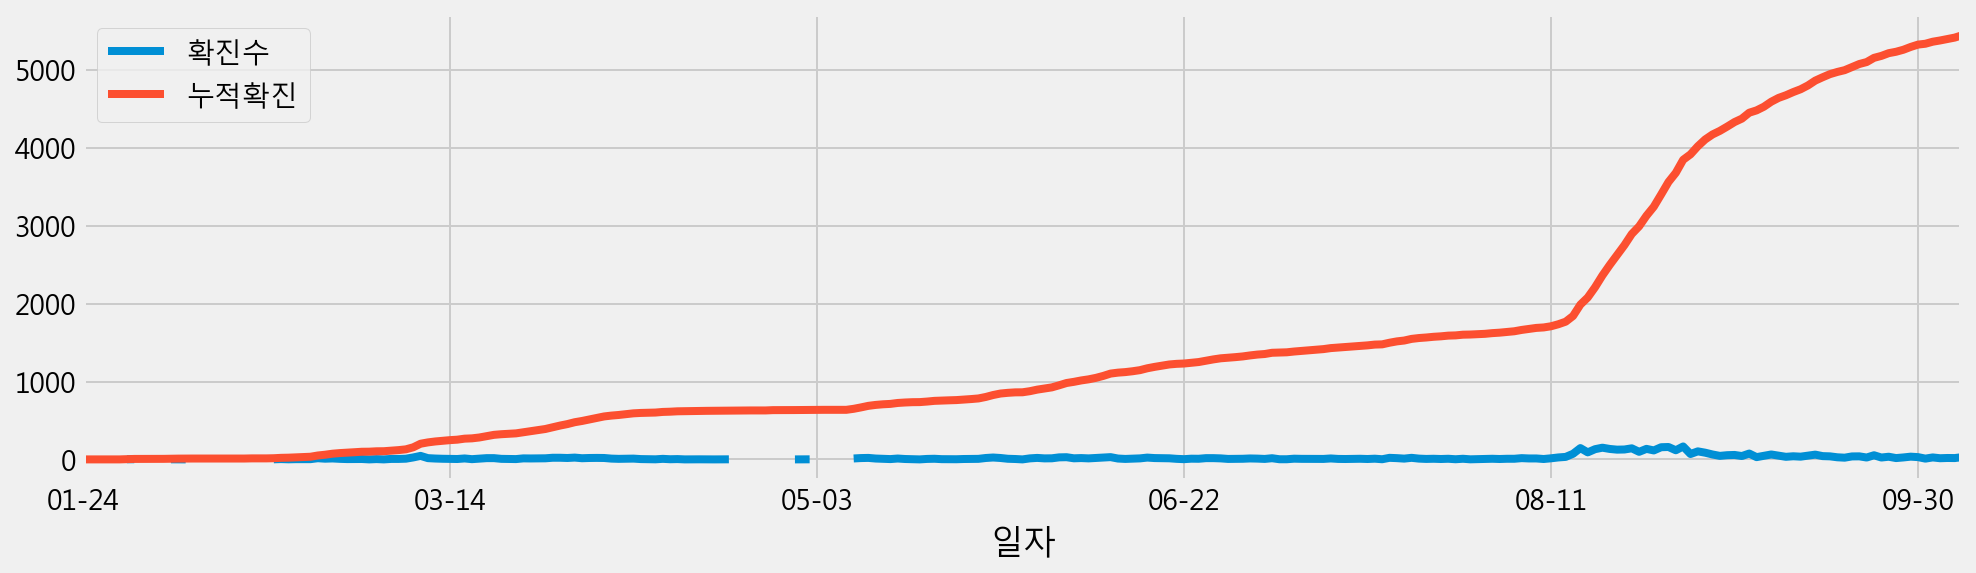

In [324]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.

cum_day.plot(figsize=(15, 4))

### 시리즈로 그리기

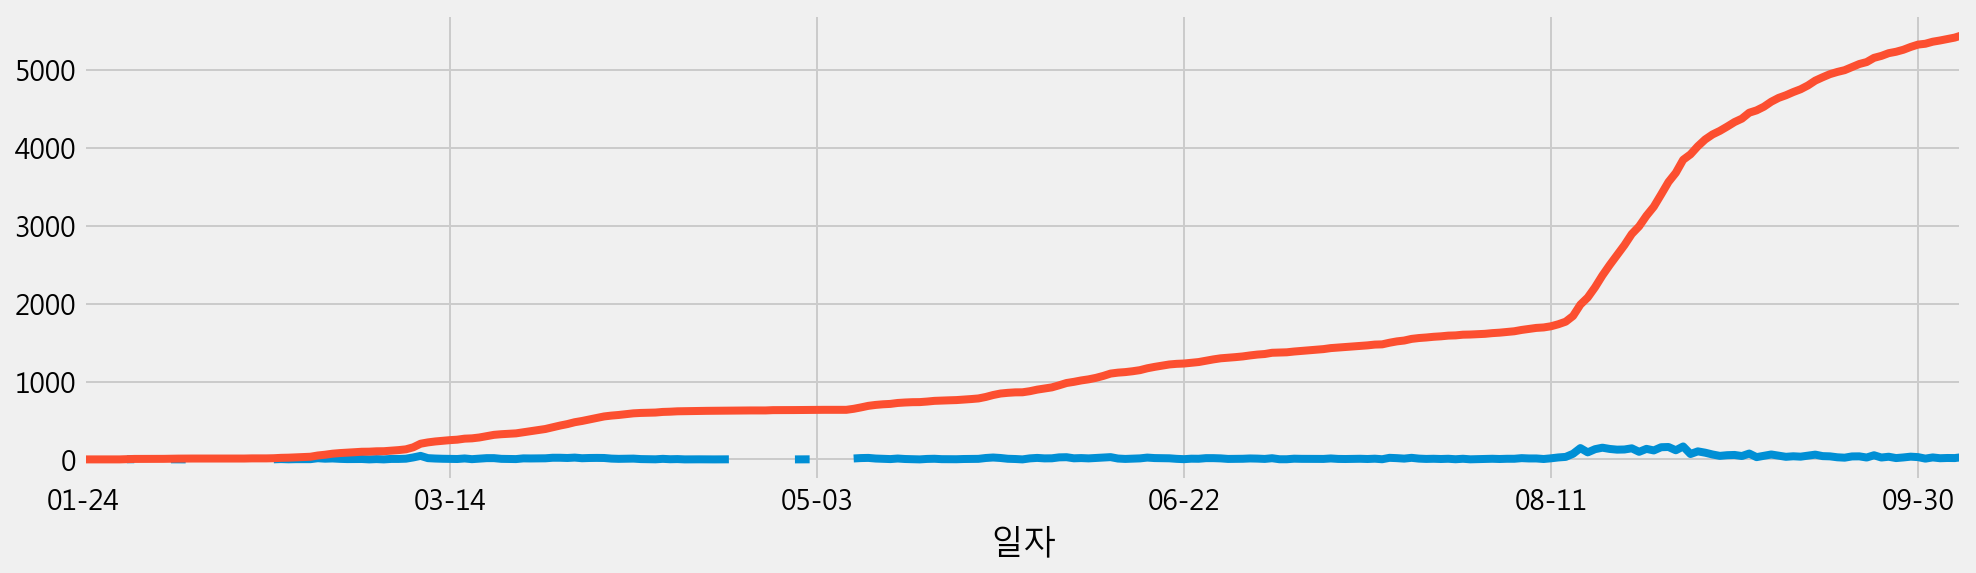

In [325]:
# 시리즈로 2개의 그래프 그리기

cum_day["확진수"].plot()
cum_day["누적확진"].plot(figsize=(15, 4))

### 확진수만 따로 그리기

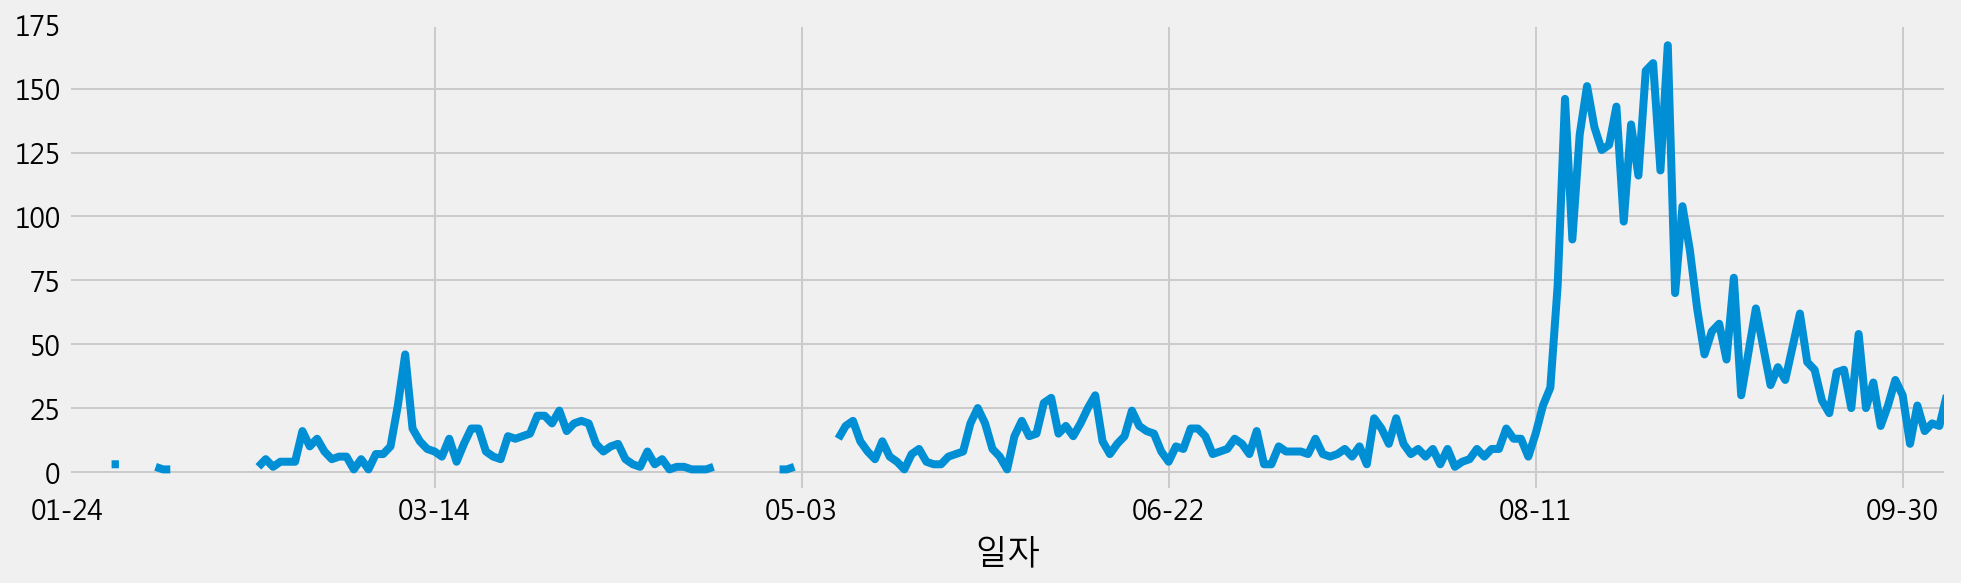

In [326]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
cum_day["확진수"].plot(figsize=(15, 4))

### 누적확진만수 따로 그리기

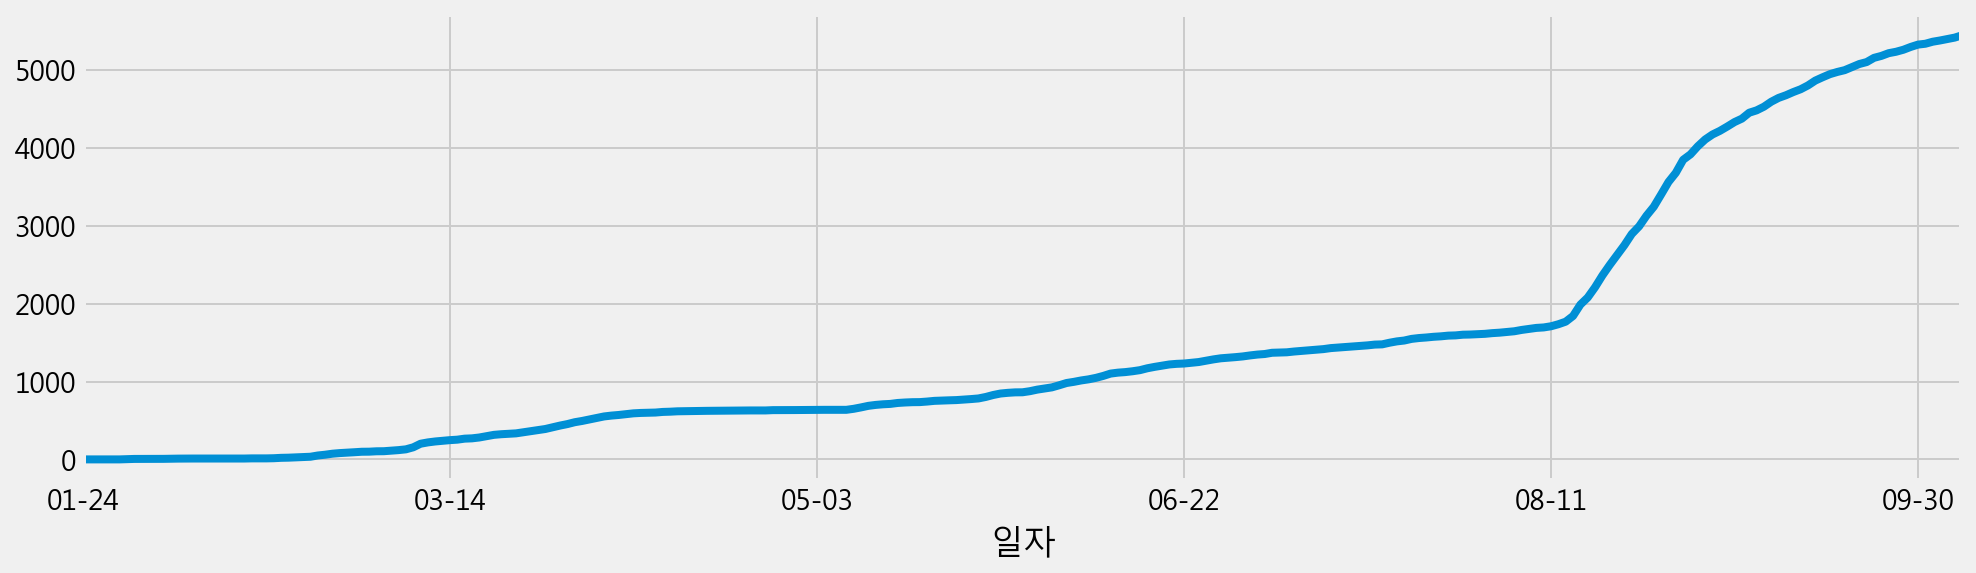

In [327]:
# 누적확진만 따로 그립니다.

cum_day["누적확진"].plot(figsize=(15, 4))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

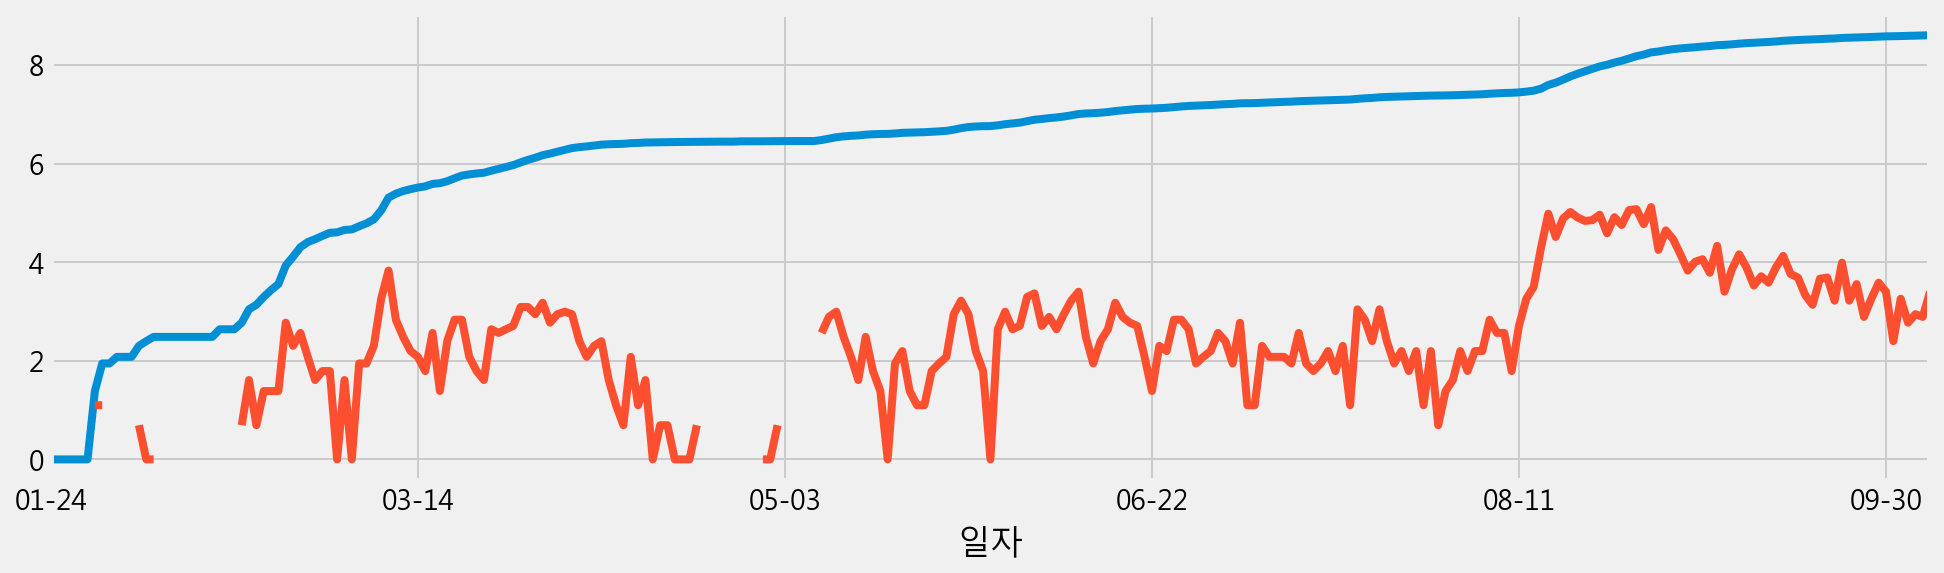

In [328]:
np.log(cum_day["누적확진"]).plot(figsize=(15, 4))
np.log(cum_day["확진수"]).plot()

## 확진월과 요일 구하기

In [329]:
# cum_day
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


### 요일별 확진 수

In [330]:
# 월별, 요일별 확진수를 groupby로 구하기

all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_week = all_day_week.unstack().fillna(0).astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [331]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [332]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.

all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [333]:
# style.background_gradient 로 색상을 표현합니다.

all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


## 거주지별 확진자

In [334]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.

gu_count = df["거주지"].value_counts()
gu_count.head()

관악구    407
송파구    341
성북구    334
타시도    315
노원구    309
Name: 거주지, dtype: int64

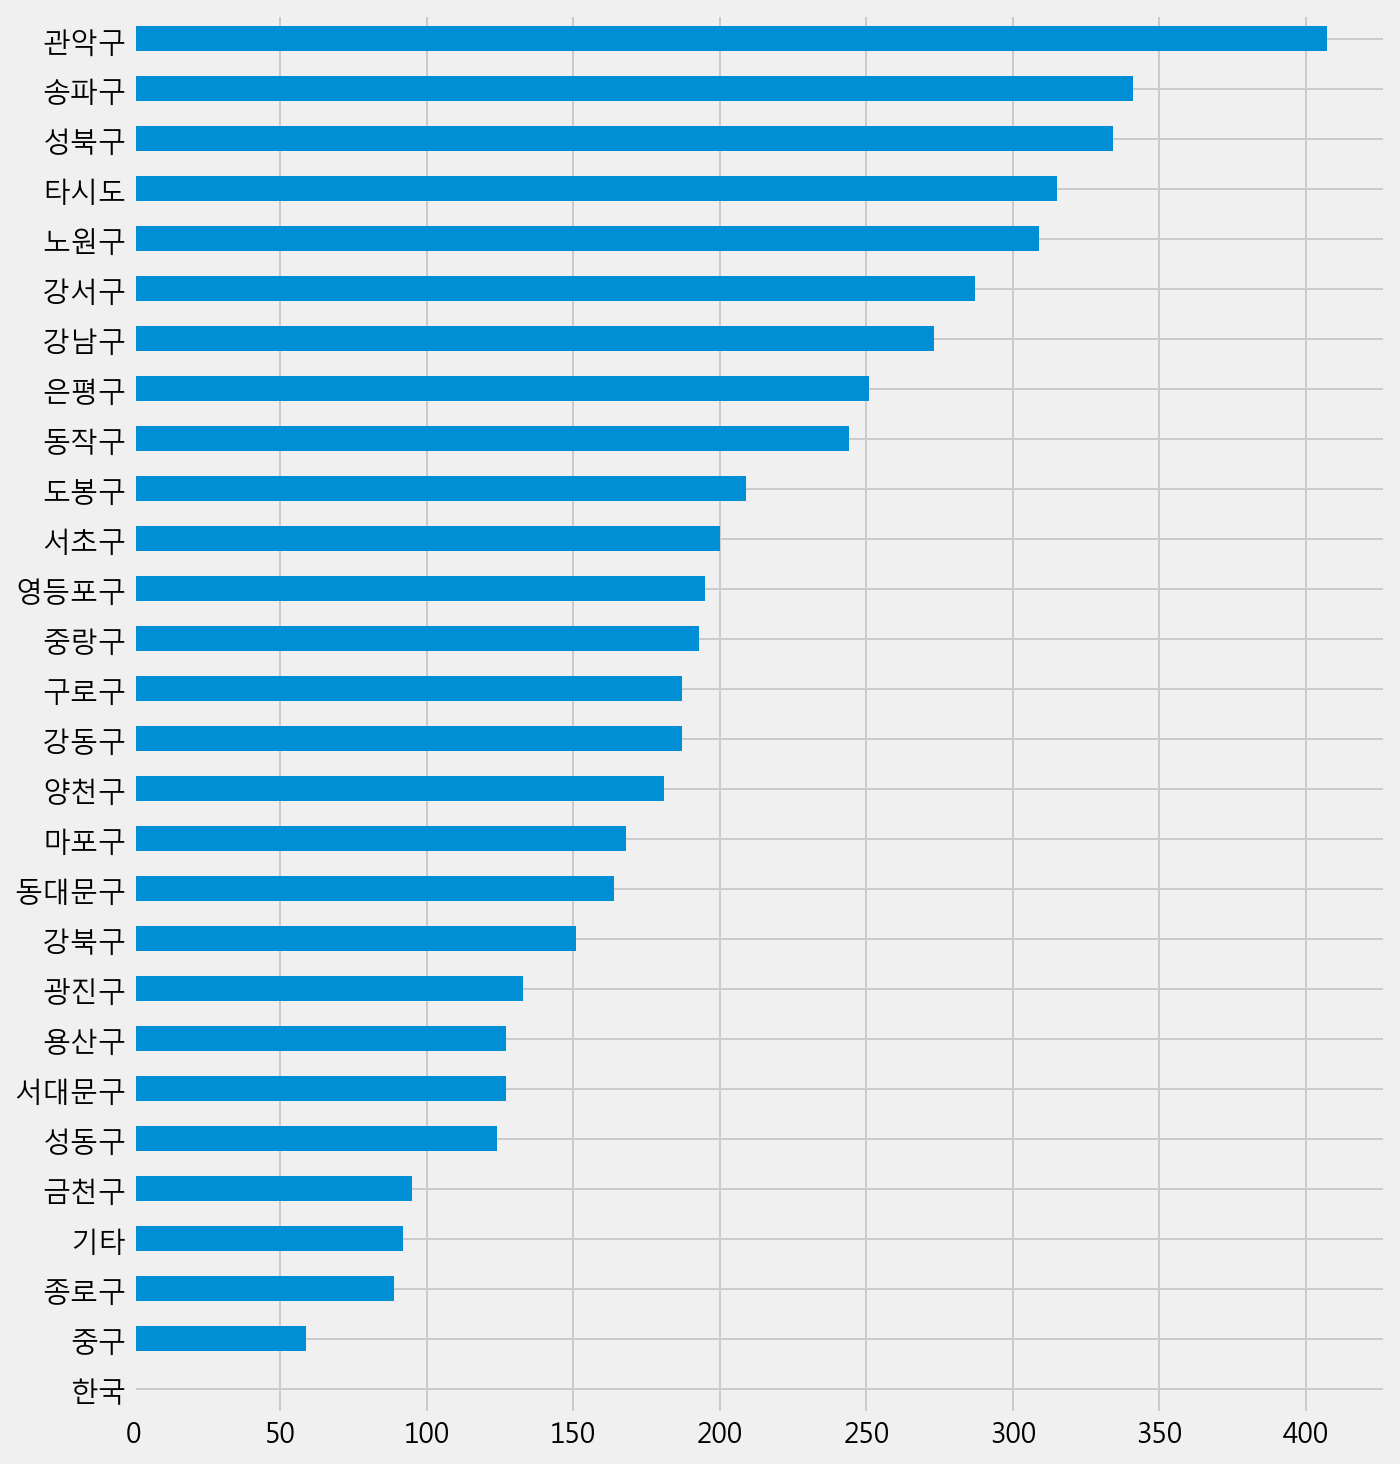

In [335]:
# 구별 확진자의 수를 시각화 합니다.

gu_count.sort_values().plot.barh(figsize=(10, 12))

In [336]:
gu_count[:28]

관악구     407
송파구     341
성북구     334
타시도     315
노원구     309
강서구     287
강남구     273
은평구     251
동작구     244
도봉구     209
서초구     200
영등포구    195
중랑구     193
구로구     187
강동구     187
양천구     181
마포구     168
동대문구    164
강북구     151
광진구     133
용산구     127
서대문구    127
성동구     124
금천구      95
기타       92
종로구      89
중구       59
한국        1
Name: 거주지, dtype: int64

In [337]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.

print(type(gu_count.index))
isSeoul = gu_count.index.str.endswith('구')
gu = gu_count[isSeoul].index
print(len(gu))
seoul = gu[:25]
print(seoul)

<class 'pandas.core.indexes.base.Index'>
25
Index(['관악구', '송파구', '성북구', '노원구', '강서구', '강남구', '은평구', '동작구', '도봉구', '서초구',
       '영등포구', '중랑구', '구로구', '강동구', '양천구', '마포구', '동대문구', '강북구', '광진구', '용산구',
       '서대문구', '성동구', '금천구', '종로구', '중구'],
      dtype='object')


In [338]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.

set(gu_count.index) - set(seoul)

{'기타', '타시도', '한국'}

In [339]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

df_gu = gu_count.reset_index()
df_gu.columns = ["구", "확진수"]
df_gu.head()

,구,확진수
0,관악구,407
1,송파구,341
2,성북구,334
3,타시도,315
4,노원구,309


In [340]:
df_gu.tail()

,구,확진수
23,금천구,95
24,기타,92
25,종로구,89
26,중구,59
27,한국,1


In [341]:
df['거주지'].unique()

array(['강북구', '용산구', '동대문구', '관악구', '송파구', '도봉구', '노원구', '타시도', '서초구',
       '영등포구', '강남구', '중랑구', '광진구', '기타', '성동구', '마포구', '구로구', '강서구',
       '금천구', '동작구', '강동구', '은평구', '성북구', '종로구', '서대문구', '중구', '양천구',
       '한국'], dtype=object)

In [342]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
df["지역"] = df["거주지"].map(lambda x : x if x in seoul else "타지역")
df[["거주지", "지역"]].head()

,거주지,지역
0,강북구,강북구
1,용산구,용산구
2,강북구,강북구
3,동대문구,동대문구
4,동대문구,동대문구


In [343]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.
gu_etc_count = df["지역"].value_counts()
gu_etc_count

타지역     408
관악구     407
송파구     341
성북구     334
노원구     309
강서구     287
강남구     273
은평구     251
동작구     244
도봉구     209
서초구     200
영등포구    195
중랑구     193
구로구     187
강동구     187
양천구     181
마포구     168
동대문구    164
강북구     151
광진구     133
용산구     127
서대문구    127
성동구     124
금천구      95
종로구      89
중구       59
Name: 지역, dtype: int64

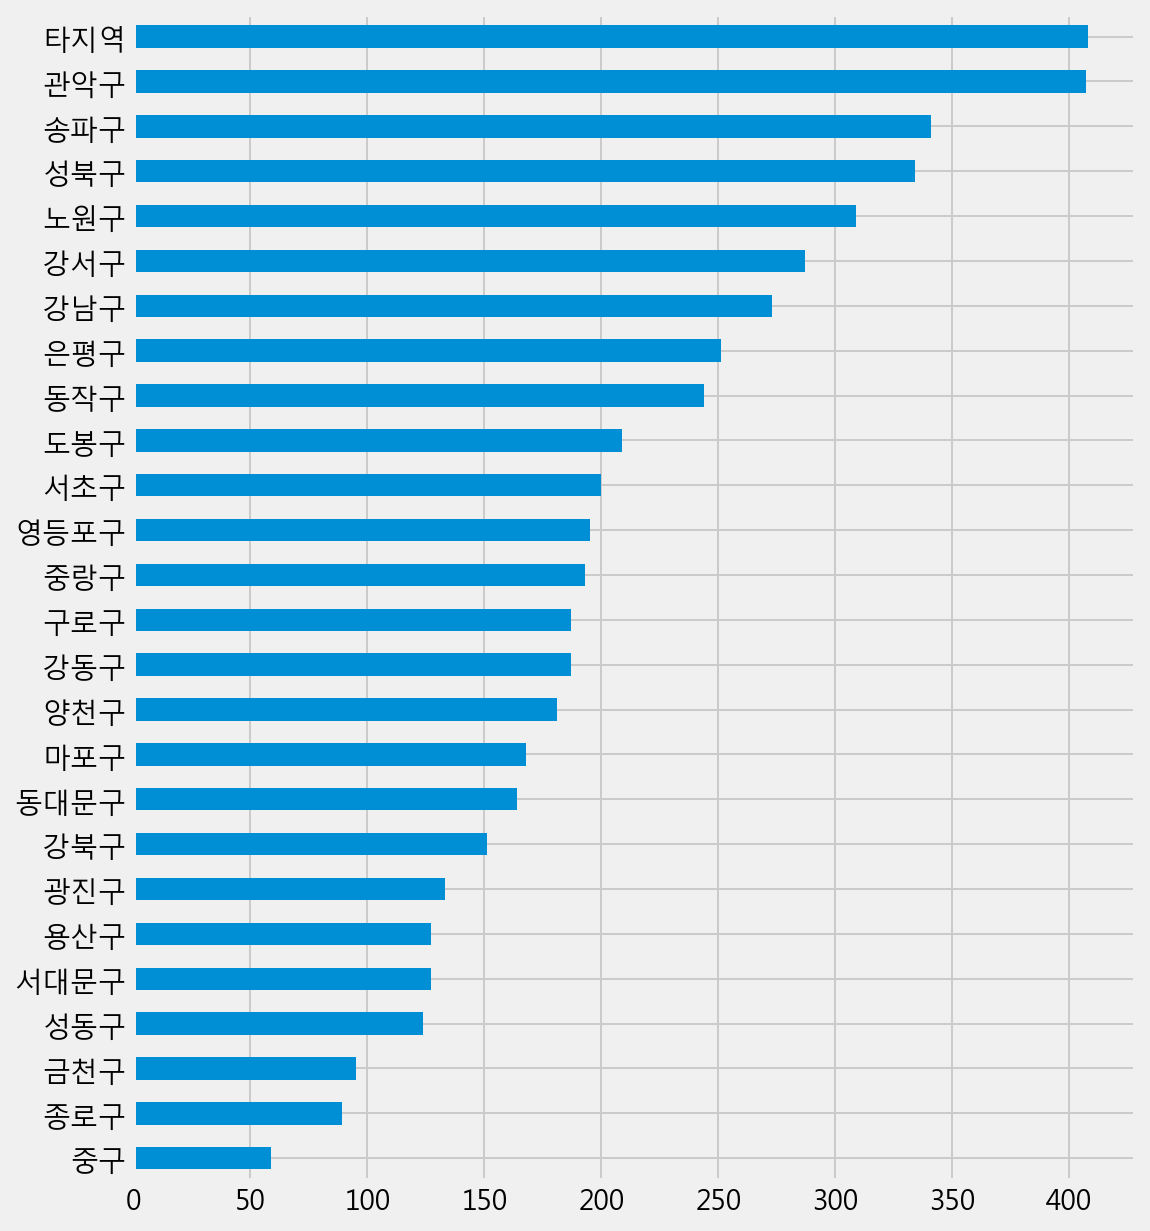

In [344]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.
gu_etc_count.sort_values().plot.barh(figsize=(8, 10))

## 접촉력

In [345]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)

기타 확진자 접촉        740
성북구 사랑제일교회 관련    641
확인 중             592
해외 접촉 추정         399
감염경로 조사중         320
타시도 확진자 접촉       228
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
구로구 콜센터 관련        60
도봉구 다나병원          50
노원구 빛가온교회 관련      46
양천구 운동시설 관련       43
요양시설 관련           43
성북구 체대입시 관련       43
확인중               42
용인시 우리제일교회 관련     41
구로구 교회 관련         41
서대문구 세브란스병원       37
콜센터직원 접촉          37
Name: 접촉력, dtype: int64

In [346]:
# 접촉력의 unique 값만 구합니다.

df["접촉력"].unique()

array(['도봉구 다나병원', '해외 접촉 추정', '강북구 북서울 꿈의교회', '기타 확진자 접촉', '감염경로 조사중',
       '타시도 확진자 접촉', '영등포구 방문판매업체 관련', '강남구 소재 대우디오빌플러스', '서초구 병원 관련',
       '영등포구 LG트윈타워', '서초구 소재 카페', '관악구 지인모임', '동작구 부동산 회사',
       '관악구 휘트니스 관련', '동작구 가족관련', '마포구 서울디자인 고등학교', '강남구 삼성화재',
       '양천구 양천경찰서', '서초구 LG 유플러스', '고양시부부관련(마포구어린이집&서초구우체국)',
       '관악구가족 관련(가가호호데이케어센터)', '관악구 식당관련', '도봉구 예마루데이케어센터',
       '마포구 서울디자인고등학교', '관악구 식당 관련', '관악구 삼모스포렉스', '신도림 역사 관련',
       '강남구 디와이디벨로먼트', '동대문구 성경모임', '송파구 우리교회', '중랑구 서울의료원', '종로구 서울대병원',
       '관악구 사랑나무 어린이집', '성동구 덕수고 야구부', '프로그래머 지인모임', '강남구 신도벤처타워',
       '강남구 K보건산업', '건축설명회', '종로구청 관련', '강남구 통신판매업', '도봉구 소재 아파트 관련',
       '영등포 소재 증권회사', '서대문구 세브란스병원', '영등포구 소재 마트 관련', '강남구 소재 금융회사',
       '동작구 요양시설 관련', '9월 송파구 지인모임', '은평구 수색성당', '서울지방국세청 관련', '수도권 지인모임',
       '서대문구 지인모임', '영등포 지인모임', '관악구 에바다 관련', '광진구 혜민병원', '8.15서울도심집회',
       '도봉구 건설현장', '도봉구 운동시설', '송파구 쿠팡 관련', '노원구 빛가온교회 관련', '서초구 장애인교육시설',
       '강동구 BF모바일 관련', '영등포구 일련정종 서울포교소', '동

In [347]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [348]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [349]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

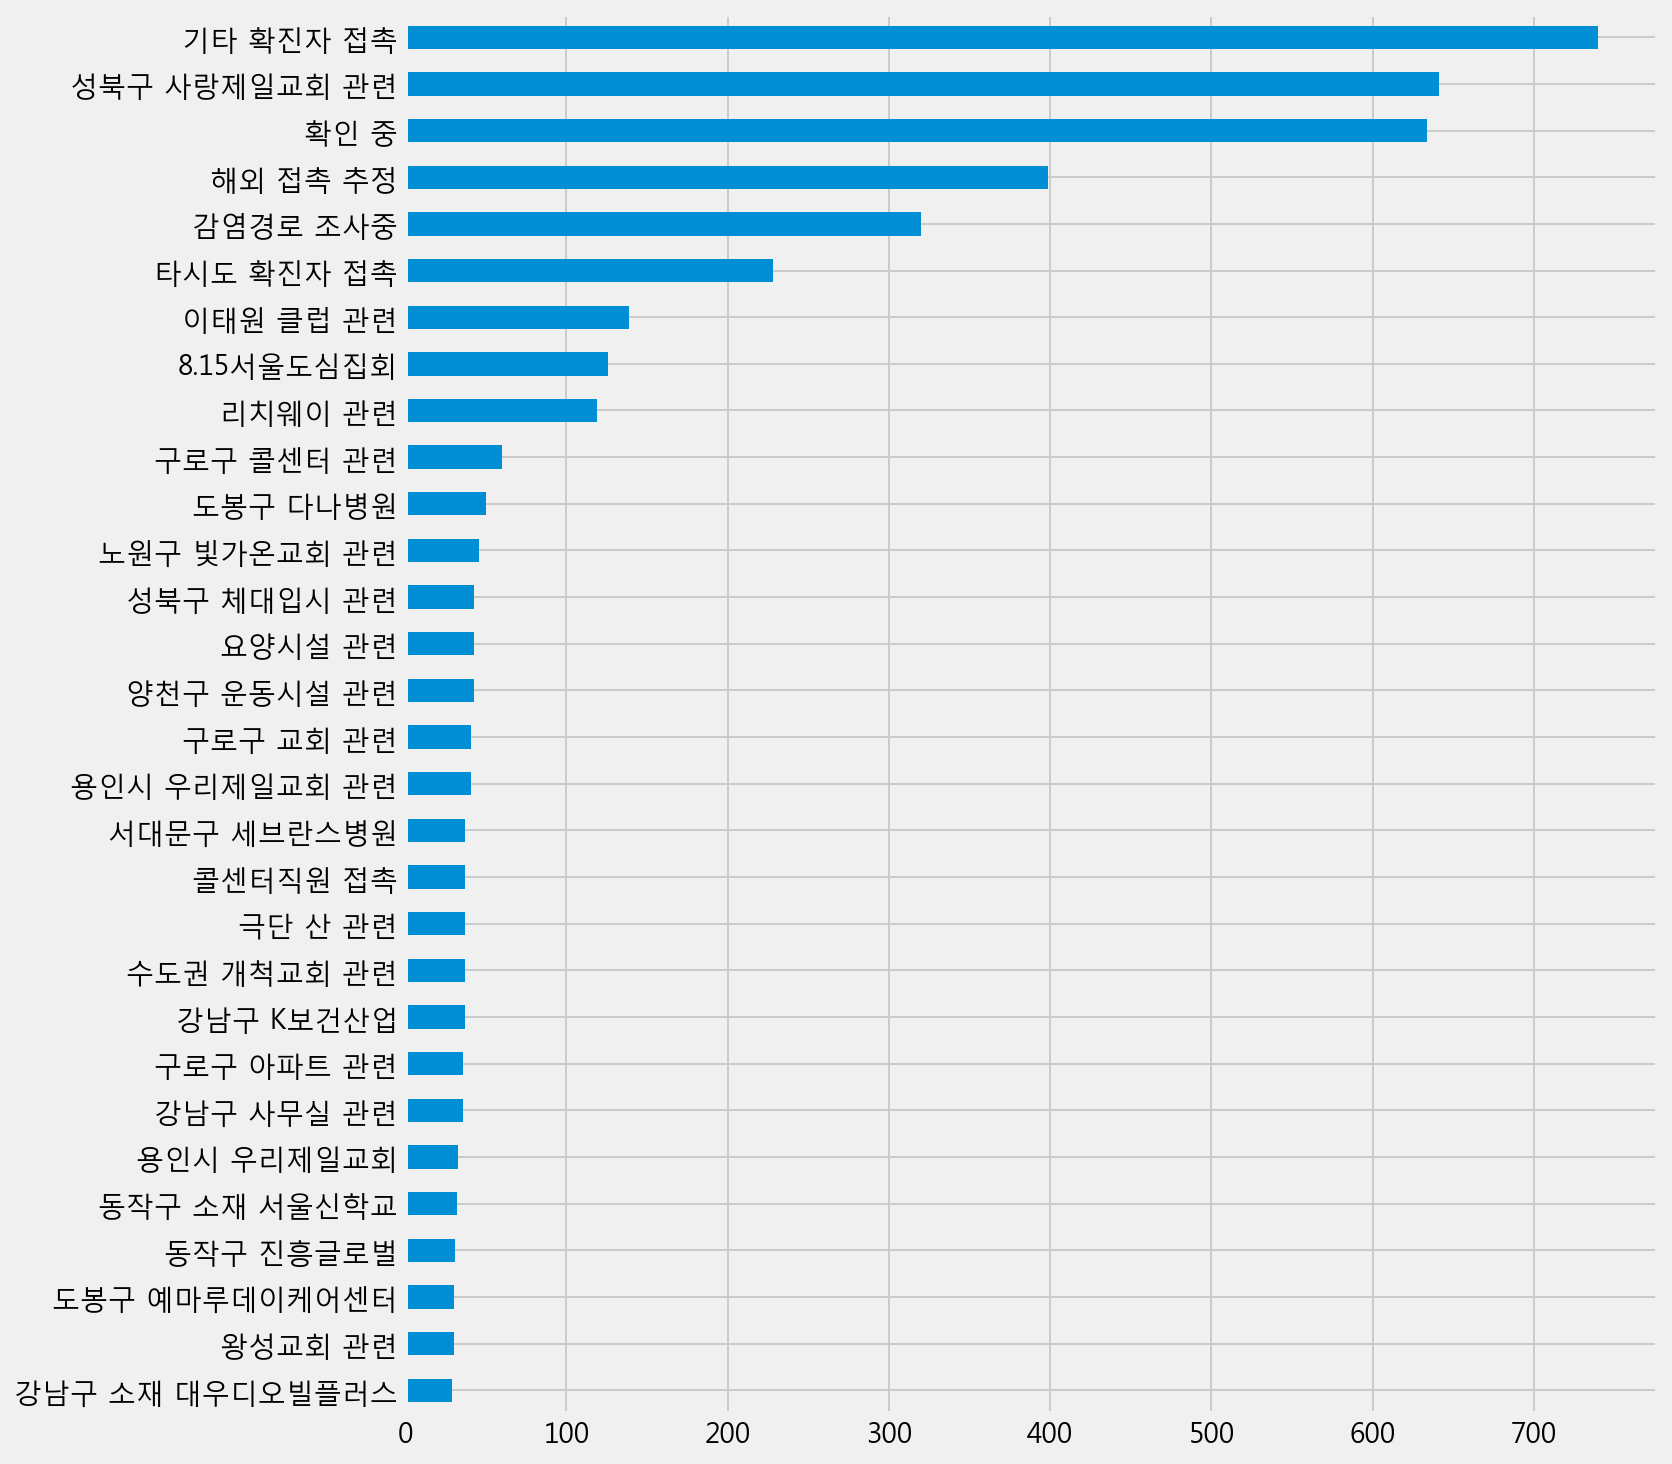

In [350]:
# 접촉력 빈도수를 시각화 합니다.

contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10, 12))

In [351]:
# 상위 15개만 구합니다.
top_contact = contact_count_top.tail(15)
top_contact

양천구 운동시설 관련       43
요양시설 관련           43
성북구 체대입시 관련       43
노원구 빛가온교회 관련      46
도봉구 다나병원          50
구로구 콜센터 관련        60
리치웨이 관련          119
8.15서울도심집회       126
이태원 클럽 관련        139
타시도 확진자 접촉       228
감염경로 조사중         320
해외 접촉 추정         399
확인 중             634
성북구 사랑제일교회 관련    641
기타 확진자 접촉        740
Name: 접촉력, dtype: int64

In [352]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.

top_contact.index

Index(['양천구 운동시설 관련', '요양시설 관련', '성북구 체대입시 관련', '노원구 빛가온교회 관련', '도봉구 다나병원',
       '구로구 콜센터 관련', '리치웨이 관련', '8.15서울도심집회', '이태원 클럽 관련', '타시도 확진자 접촉',
       '감염경로 조사중', '해외 접촉 추정', '확인 중', '성북구 사랑제일교회 관련', '기타 확진자 접촉'],
      dtype='object')

In [353]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5443,24333,10.06.,강북구,-,도봉구 다나병원,NaN,2020-10-06,10,41,10-06,강북구
1,5442,24321,10.06.,용산구,프랑스,해외 접촉 추정,NaN,2020-10-06,10,41,10-06,용산구
3,5440,24331,10.06.,동대문구,-,기타 확진자 접촉,NaN,2020-10-06,10,41,10-06,동대문구
4,5439,24330,10.06.,동대문구,-,감염경로 조사중,NaN,2020-10-06,10,41,10-06,동대문구
5,5438,24314,10.06.,관악구,-,감염경로 조사중,NaN,2020-10-06,10,41,10-06,관악구


In [354]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
top_group.groupby(["접촉력", "월"])["연번"].count()

접촉력            월 
8.15서울도심집회     8     113
               9      13
감염경로 조사중       8      10
               9     284
               10     26
구로구 콜센터 관련     3      60
기타 확진자 접촉      8     417
               9     309
               10     14
노원구 빛가온교회 관련   8      35
               9      11
도봉구 다나병원       9      33
               10     17
리치웨이 관련        6     119
성북구 사랑제일교회 관련  8     628
               9      13
성북구 체대입시 관련    8      39
               9       4
양천구 운동시설 관련    6      43
요양시설 관련        6      43
이태원 클럽 관련      5     133
               6       6
타시도 확진자 접촉     2       5
               3      17
               4       4
               5       2
               6       6
               7      16
               8      92
               9      76
               10     10
해외 접촉 추정       2       1
               3     121
               4     112
               5      24
               6      23
               7      39
               8      47
               9      23
       

In [355]:
top_group.groupby(["접촉력", "월"])["연번"].count().unstack()

월,2,3,4,5,6,7,8,9,10
접촉력,,,,,,,,,
8.15서울도심집회,NaN,NaN,NaN,NaN,NaN,NaN,113.0,13.0,NaN
감염경로 조사중,NaN,NaN,NaN,NaN,NaN,NaN,10.0,284.0,26.0
구로구 콜센터 관련,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
기타 확진자 접촉,NaN,NaN,NaN,NaN,NaN,NaN,417.0,309.0,14.0
노원구 빛가온교회 관련,NaN,NaN,NaN,NaN,NaN,NaN,35.0,11.0,NaN
도봉구 다나병원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,17.0
리치웨이 관련,NaN,NaN,NaN,NaN,119.0,NaN,NaN,NaN,NaN
성북구 사랑제일교회 관련,NaN,NaN,NaN,NaN,NaN,NaN,628.0,13.0,NaN
성북구 체대입시 관련,NaN,NaN,NaN,NaN,NaN,NaN,39.0,4.0,NaN


In [356]:
top_group.groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)

월,2,3,4,5,6,7,8,9,10
접촉력,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,113,13,0
감염경로 조사중,0,0,0,0,0,0,10,284,26
구로구 콜센터 관련,0,60,0,0,0,0,0,0,0
기타 확진자 접촉,0,0,0,0,0,0,417,309,14
노원구 빛가온교회 관련,0,0,0,0,0,0,35,11,0
도봉구 다나병원,0,0,0,0,0,0,0,33,17
리치웨이 관련,0,0,0,0,119,0,0,0,0
성북구 사랑제일교회 관련,0,0,0,0,0,0,628,13,0
성북구 체대입시 관련,0,0,0,0,0,0,39,4,0


### 8.15서울도심집회 관련
* 8.15서울도심집회 관련 확진자를 찾아봅니다.

In [357]:
df[df["접촉력"].str.contains("8.15")]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
769,4674,22192,9.13.,마포구,-,8.15서울도심집회,사망,2020-09-13,9,37,09-13,마포구
927,4516,21669,9.09.,노원구,-,8.15서울도심집회,퇴원,2020-09-09,9,37,09-09,노원구
1008,4435,21494,9.07.,강서구,-,8.15서울도심집회,퇴원,2020-09-07,9,37,09-07,강서구
1066,4377,21314,9.07.,구로구,-,8.15서울도심집회,퇴원,2020-09-07,9,37,09-07,구로구
1101,4342,21210,9.06.,노원구,-,8.15서울도심집회,퇴원,2020-09-06,9,36,09-06,노원구
...,...,...,...,...,...,...,...,...,...,...,...,...
3028,2415,16123,8.19.,도봉구,-,8.15서울도심집회,퇴원,2020-08-19,8,34,08-19,도봉구
3041,2402,16239,8.19.,중랑구,-,8.15서울도심집회,퇴원,2020-08-19,8,34,08-19,중랑구
3073,2370,16129,8.19.,강북구,-,8.15서울도심집회,퇴원,2020-08-19,8,34,08-19,강북구
3112,2331,15983,8.18.,종로구,-,8.15서울도심집회,퇴원,2020-08-18,8,34,08-18,종로구


### 감염경로 불명

In [358]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.

df_unknown = df[df["접촉력"] == "확인 중"]
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
1485,3958,20163,8.31.,양천구,-,확인 중,퇴원,2020-08-31,8,36,08-31,양천구
1486,3957,20141,8.31.,은평구,-,확인 중,퇴원,2020-08-31,8,36,08-31,은평구
1487,3956,20159,8.31.,용산구,-,확인 중,퇴원,2020-08-31,8,36,08-31,용산구
1491,3952,20130,8.31.,도봉구,-,확인 중,퇴원,2020-08-31,8,36,08-31,도봉구
1497,3946,20039,8.31.,타시도,-,확인 중,퇴원,2020-08-31,8,36,08-31,타지역


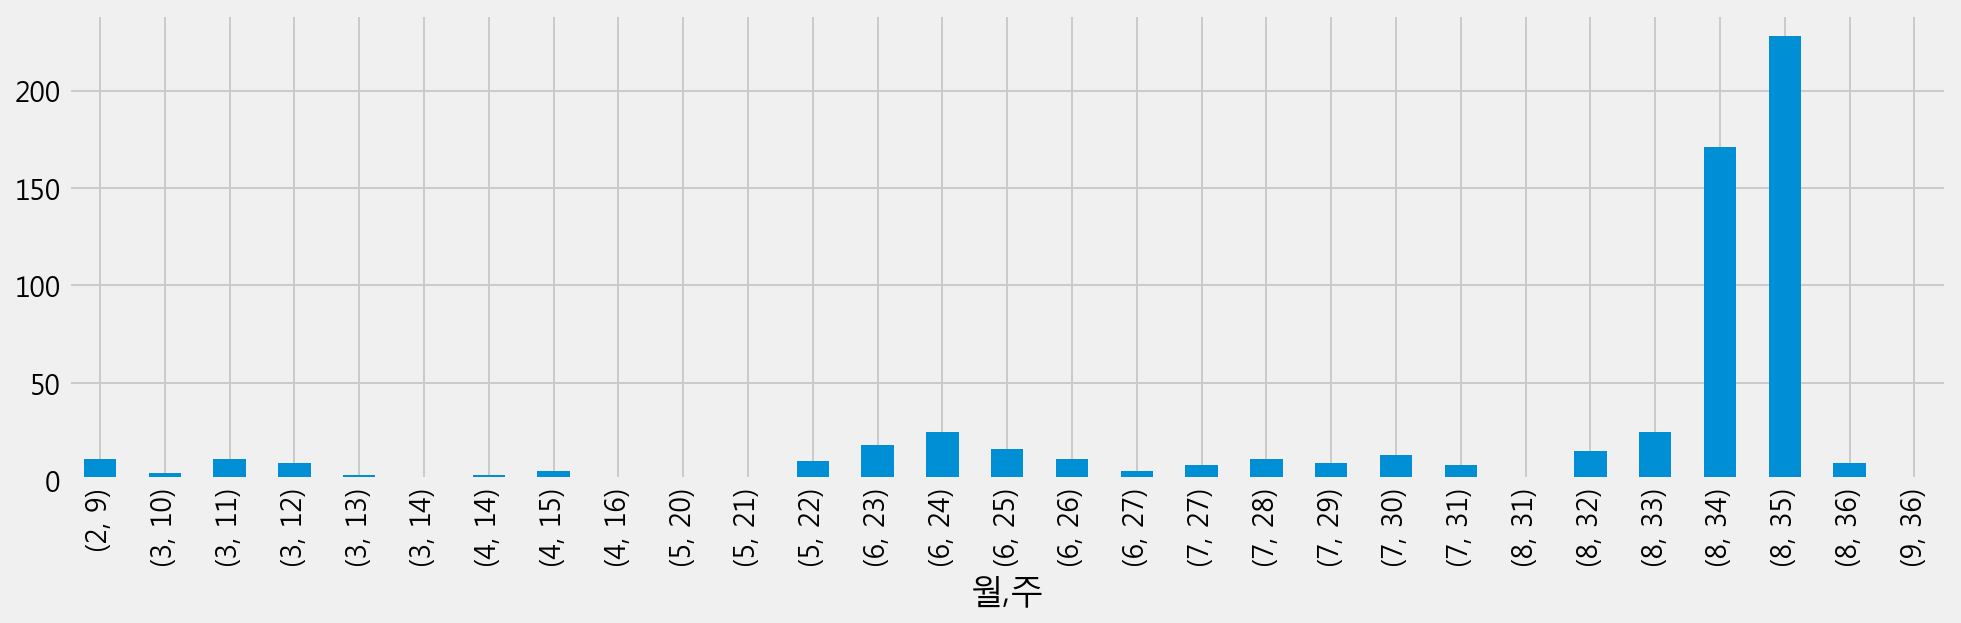

In [359]:
# 감염경로 불명이 어느정도인지 봅니다.
unknown_weekly_case = df_unknown.groupby(["월", "주"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(15, 4))

In [360]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
35,924
34,913
36,458
33,390
37,341


In [361]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
35,228
34,171
24,25
33,25
23,18


In [362]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case.head()

,전체확진수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3


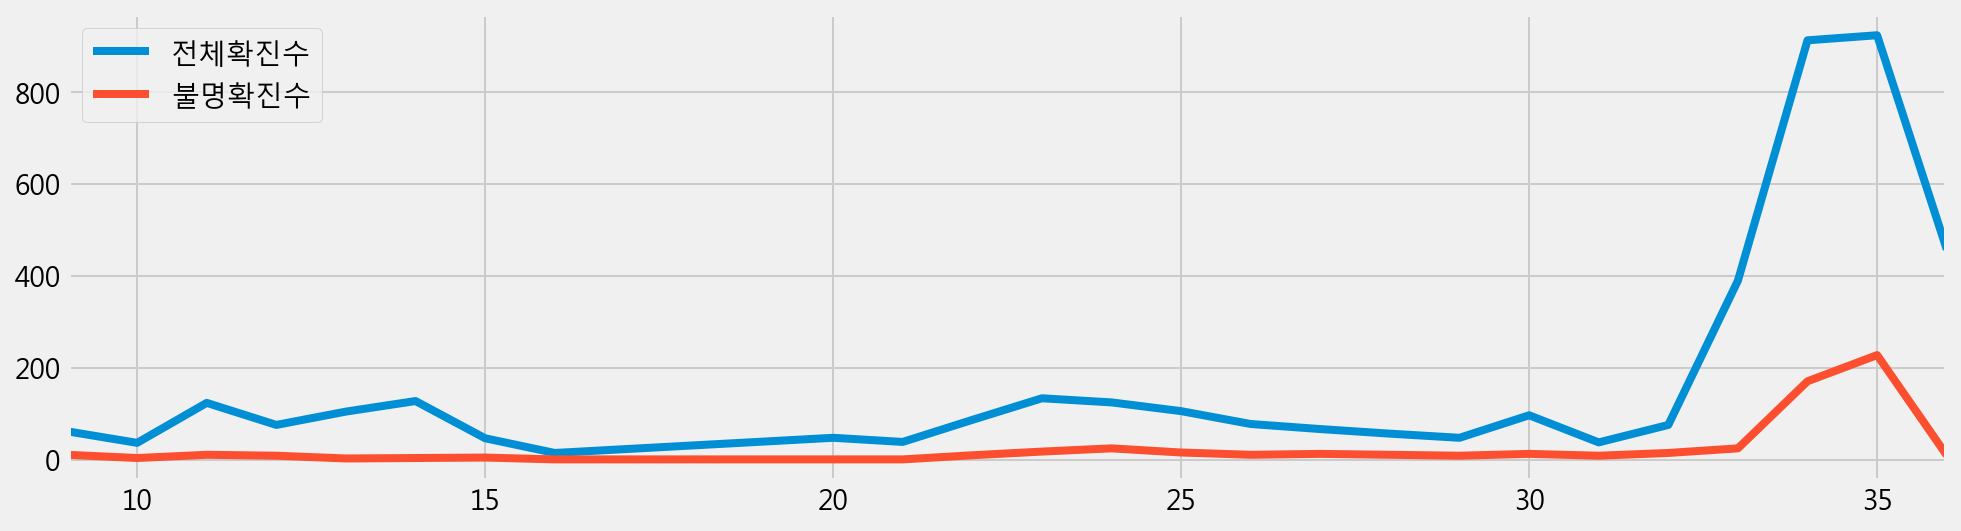

In [363]:
# 위에서 구한 결과를 시각화 합니다.

unknown_case.plot(figsize=(15, 4))

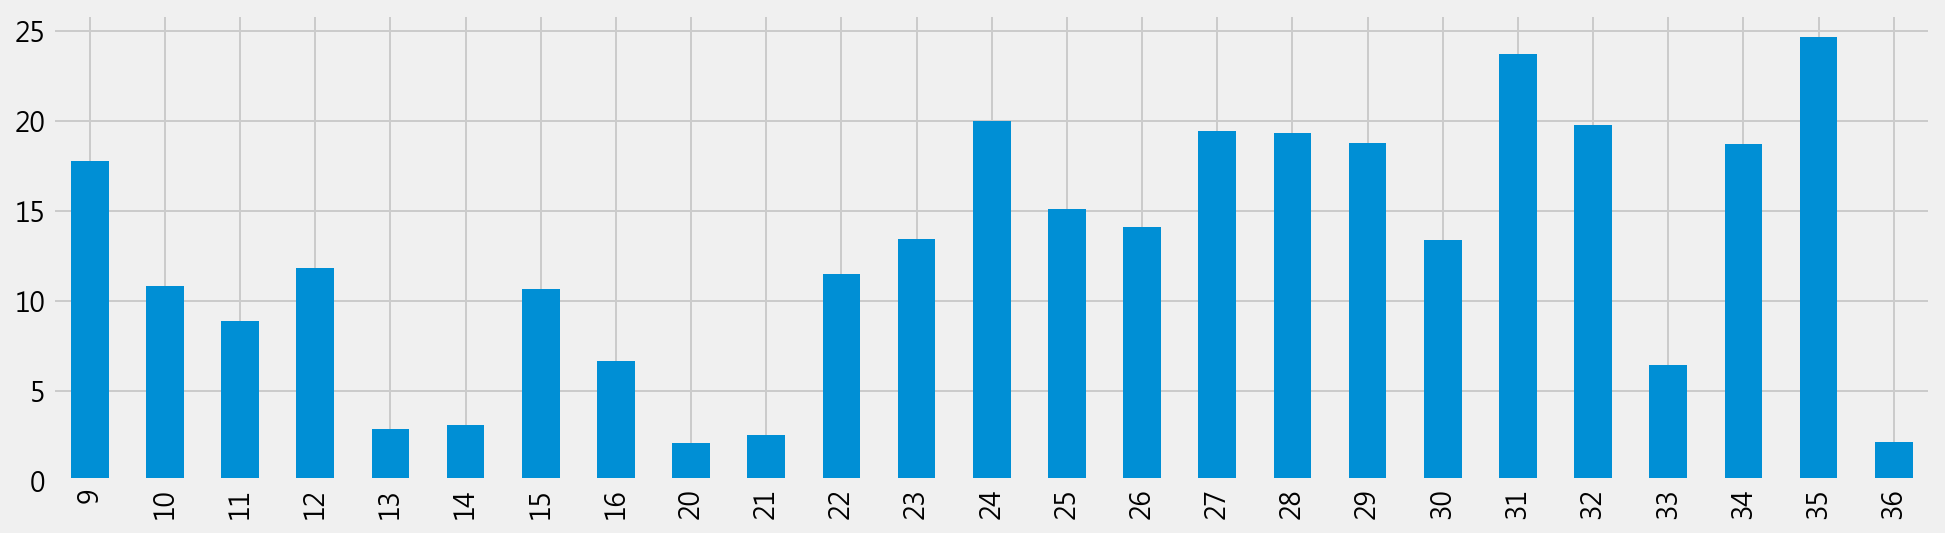

In [364]:
# 감염경로 "확인 중"의 주별 비율

unknown_case["확인중비율"] = (unknown_case["불명확진수"] / unknown_case["전체확진수"]) * 100
unknown_case["확인중비율"].plot.bar(figsize=(15, 4))

## 가장 많은 전파가 일어난 번호
* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지

In [365]:
# 정규표현식 라이브러리를 불러옵니다.
import re

# 함수를 통해 숫자외의 문자를 제거하는 get_number 함수를 만듭니다.

def get_number(text):
    return re.sub("[^0-9]", "", text)

get_number("#7265 접촉(추정)")

'7265'

In [366]:
df['접촉력']

0           도봉구 다나병원
1           해외 접촉 추정
2       강북구 북서울 꿈의교회
3          기타 확진자 접촉
4           감염경로 조사중
            ...     
5438           #5 접촉
5439           해외 접촉
5440           #3 접촉
5441           해외 접촉
5442           해외 접촉
Name: 접촉력, Length: 5443, dtype: object

In [367]:
# 함수를 map을 통해 접촉번호를 구합니다.

df["접촉번호"] = df["접촉력"].map(get_number)
df["접촉번호"].value_counts().reset_index()

,index,접촉번호
0,,5224
1,815,126
2,6,4
3,9,4
4,9734,4
...,...,...
61,2621,1
62,8138,1
63,8646,1
64,30,1


In [368]:
contact = df["접촉번호"].value_counts().reset_index()
contact.head()

,index,접촉번호
0,,5224
1,815,126
2,6,4
3,9,4
4,9734,4


In [369]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError 가 납니다. 
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.

df_contact = contact.drop(0)
df_contact = df_contact.head(10)
df_contact

,index,접촉번호
1,815,126
2,6,4
3,9,4
4,9734,4
5,780,3
6,8271,3
7,8791,3
8,14483,3
9,8486,3
10,6832,2


In [370]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.

top_contact_no = df_contact["index"]
top_contact_no

1       815
2         6
3         9
4      9734
5       780
6      8271
7      8791
8     14483
9      8486
10     6832
Name: index, dtype: object

In [371]:
df[df['접촉번호'] == '815']

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
769,4674,22192,9.13.,마포구,-,8.15서울도심집회,사망,2020-09-13,9,37,09-13,마포구,815
927,4516,21669,9.09.,노원구,-,8.15서울도심집회,퇴원,2020-09-09,9,37,09-09,노원구,815
1008,4435,21494,9.07.,강서구,-,8.15서울도심집회,퇴원,2020-09-07,9,37,09-07,강서구,815
1066,4377,21314,9.07.,구로구,-,8.15서울도심집회,퇴원,2020-09-07,9,37,09-07,구로구,815
1101,4342,21210,9.06.,노원구,-,8.15서울도심집회,퇴원,2020-09-06,9,36,09-06,노원구,815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,2415,16123,8.19.,도봉구,-,8.15서울도심집회,퇴원,2020-08-19,8,34,08-19,도봉구,815
3041,2402,16239,8.19.,중랑구,-,8.15서울도심집회,퇴원,2020-08-19,8,34,08-19,중랑구,815
3073,2370,16129,8.19.,강북구,-,8.15서울도심집회,퇴원,2020-08-19,8,34,08-19,강북구,815
3112,2331,15983,8.18.,종로구,-,8.15서울도심집회,퇴원,2020-08-18,8,34,08-18,종로구,815


In [372]:
# contact의 환자번호와 df의 접촉번호를 merge 합니다.

df[df["접촉번호"].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
483,4960,22951,9.19.,송파구,-,9월 송파구 지인모임,NaN,2020-09-19,9,38,09-19,송파구,9
550,4893,22755,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
551,4892,22756,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
552,4891,22757,9.17.,송파구,-,9월 송파구 지인모임,NaN,2020-09-17,9,38,09-17,송파구,9
769,4674,22192,9.13.,마포구,-,8.15서울도심집회,사망,2020-09-13,9,37,09-13,마포구,815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,33,797,2.24.,송파구,-,#780 접촉(추정),퇴원,2020-02-24,2,9,02-24,송파구,780
5426,17,83,2.20.,종로구,-,#6 접촉(추정),퇴원,2020-02-20,2,8,02-20,종로구,6
5433,10,21,2.5.,성북구,-,#6 접촉,퇴원,2020-02-05,2,6,02-05,성북구,6
5436,7,11,1.31.,종로구,-,#6 접촉,퇴원,2020-01-31,1,5,01-31,종로구,6


## 퇴원현황

In [373]:
df['퇴원현황'].value_counts()

퇴원    4736
사망      61
Name: 퇴원현황, dtype: int64

## 여행력

In [374]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"]

0            -
1          프랑스
2            -
3            -
4            -
         ...  
5438         -
5439    중국 우한시
5440         -
5441    중국 우한시
5442    중국 우한시
Name: 해외, Length: 5443, dtype: object

In [375]:
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"].nunique()

80

In [376]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 유니크한 텍스트 갯수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df["해외"].describe()

count     428
unique     80
top        미국
freq      144
Name: 해외, dtype: object

In [377]:
df["해외"].value_counts().head(10)

미국        144
영국         50
필리핀        24
스페인        12
프랑스        12
우즈베키스탄     12
이라크        10
카자흐스탄      10
인도          9
일본          9
Name: 해외, dtype: int64

### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [378]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(428, 14)

In [379]:
# 중복되는 지역명이 있는지 확인합니다.
df_oversea["해외"].unique()

array(['프랑스', '우간다', '일본', '몰타', '영국', '체코', '미국', '인도네시아', '네팔', '인도',
       '우즈베키스탄', '카타르', '우크라이나', '필리핀', '에콰도르', '키르기즈스탄', '파라과이',
       '멕시코, 미국', '카자흐스탄', '독일', '중국', '이집트', '21263', '터키', '사우디아라비아',
       '베트남', '에티오피아', '스페인', '케냐', '방글라데시', '멕시코', '홍콩', '러시아', '이라크',
       '키르기스스탄', '모로코, 터키', '쿠웨이트', '나이지리아', '미국, 멕시코', '페루', '아랍에미리트',
       'UAE', '파키스탄', '아일랜드', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '이탈리아', '포르투칼',
       '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '폴란드', '말레이시아', '필리핀, 마닐라',
       '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아',
       '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스',
       '이탈리아, 독일, 홍콩', '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [380]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,해외
1,5442,24321,10.06.,용산구,프랑스,해외 접촉 추정,NaN,2020-10-06,10,41,10-06,용산구,,프랑스
38,5405,24208,10.05.,구로구,영국,해외 접촉 추정,NaN,2020-10-05,10,41,10-05,구로구,,영국
45,5398,24215,10.05.,강서구,체코,해외 접촉 추정,NaN,2020-10-05,10,41,10-05,강서구,,체코
268,5175,23501,9.25.,서초구,체코,해외 접촉 추정,NaN,2020-09-25,9,39,09-25,서초구,,체코
1621,3822,19817,8.29.,기타,영국,해외 접촉 추정,퇴원,2020-08-29,8,35,08-29,타지역,,영국


In [381]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [382]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea["해외"].value_counts()

미국           146
유럽           107
필리핀           26
남미            22
우즈베키스탄        12
이라크           10
카자흐스탄         10
인도             9
중국             9
일본             9
태국             6
인도네시아          6
러시아            5
UAE            5
캐나다            5
키르기스스탄         4
파키스탄           4
네팔             3
베트남            3
팔라우            2
사우디아라비아        2
우크라이나          2
이집트            2
방글라데시          2
에콰도르           2
포르투칼           1
몰타             1
우간다            1
키르기즈스탄         1
홍콩             1
21263          1
말레이시아          1
호주, 인도네시아      1
나이지리아          1
싱가포르           1
쿠웨이트           1
파라과이           1
케냐             1
카타르            1
에티오피아          1
Name: 해외, dtype: int64

In [383]:
# 확진일자, 해외 별 카운트 수를 구합니다.

day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      2
2020-02-02  중국      1
2020-02-05  싱가포르    1
2020-02-06  중국      1
Name: 연번, dtype: int64

In [384]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.

day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일자        해외  
2020-01-24  중국        1
2020-01-30  중국        3
2020-02-02  중국        4
2020-02-05  싱가포르      1
2020-02-06  중국        5
                   ... 
2020-10-05  유럽      106
2020-10-06  몰타        1
            우간다       1
            유럽      107
            일본        9
Name: 연번, Length: 268, dtype: int64

In [385]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.

df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea.head()

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [386]:
# "해외" 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea["해외"].value_counts()

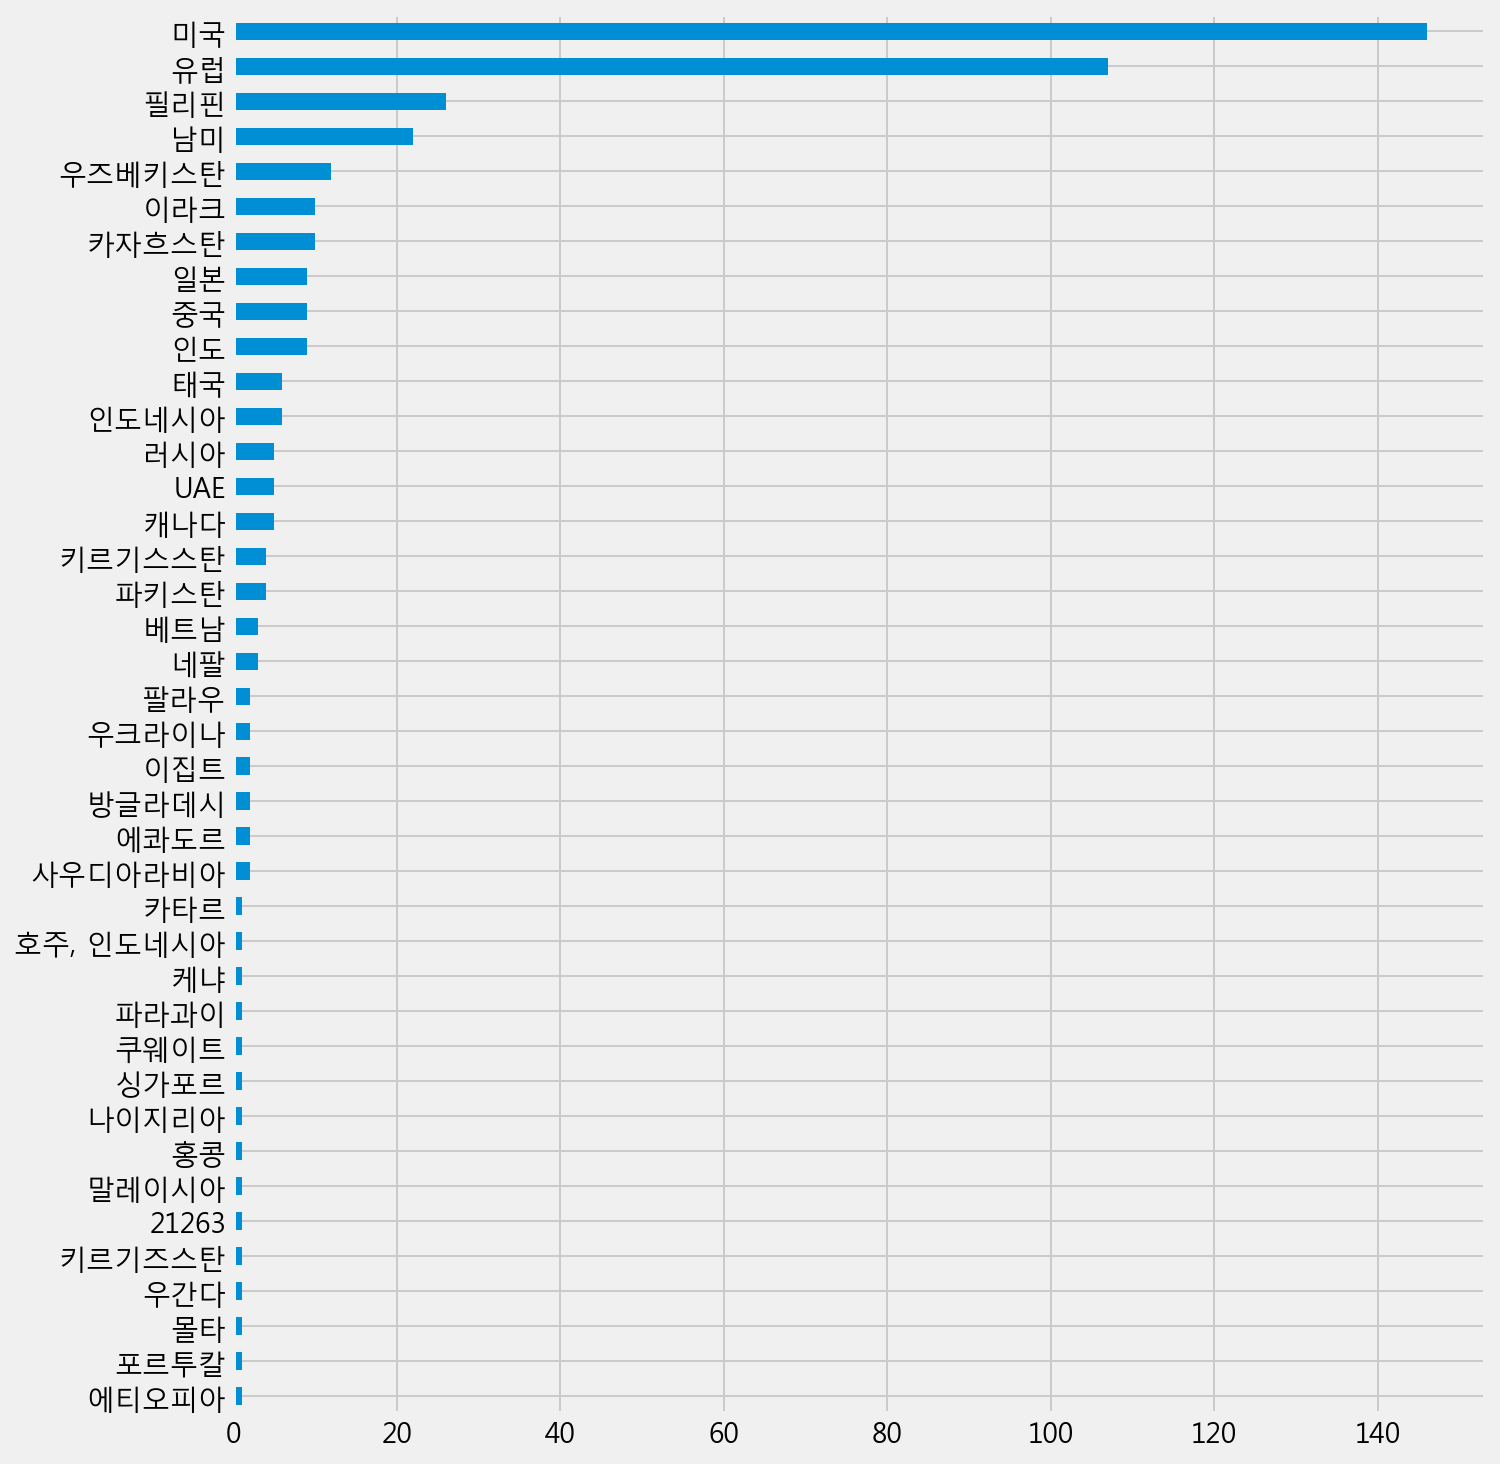

In [387]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.sort_values().plot.barh(figsize=(10, 12))

In [388]:
df_day_oversea = df_day_oversea.set_index("확진일자")
df_day_oversea.head()

,해외,누적확진수
확진일자,,
2020-01-24,중국,1
2020-01-30,중국,3
2020-02-02,중국,4
2020-02-05,싱가포르,1
2020-02-06,중국,5


In [389]:
df_day_oversea.pivot(columns="해외")

누적확진수                                                 ...         \
해외         21263 UAE 나이지리아  남미   네팔 러시아 말레이시아   몰타     미국 방글라데시  ... 키르기스스탄   
확진일자                                                             ...          
2020-01-24   NaN NaN   NaN NaN  NaN NaN   NaN  NaN    NaN   NaN  ...    NaN   
2020-01-30   NaN NaN   NaN NaN  NaN NaN   NaN  NaN    NaN   NaN  ...    NaN   
2020-02-02   NaN NaN   NaN NaN  NaN NaN   NaN  NaN    NaN   NaN  ...    NaN   
2020-02-05   NaN NaN   NaN NaN  NaN NaN   NaN  NaN    NaN   NaN  ...    NaN   
2020-02-06   NaN NaN   NaN NaN  NaN NaN   NaN  NaN    NaN   NaN  ...    NaN   
...          ...  ..   ...  ..  ...  ..   ...  ...    ...   ...  ...    ...   
2020-09-26   NaN NaN   NaN NaN  NaN NaN   NaN  NaN    NaN   NaN  ...    NaN   
2020-10-01   NaN NaN   NaN NaN  3.0 NaN   NaN  NaN    NaN   NaN  ...    NaN   
2020-10-02   NaN NaN   NaN NaN  NaN NaN   NaN  NaN  146.0   NaN  ...    NaN   
2020-10-05   NaN NaN   NaN NaN  NaN NaN   NaN  NaN    NaN   NaN  ...    NaN   
2020-10-06   NaN NaN   NaN NaN  NaN NaN   NaN  1.0    NaN   NaN  ...    NaN   

                                                            
해외         키르기즈스탄  태국 파라과이 파키스탄 팔라우 포르투칼 필리핀 호주, 인도네시아  홍콩  
확진일자                                                        
2020-01-24    NaN NaN  NaN  NaN NaN  NaN NaN       NaN NaN  
2020-01-30    NaN NaN  NaN  NaN NaN  NaN NaN       NaN NaN  
2020-02-02    NaN NaN  NaN  NaN NaN  NaN NaN       NaN NaN  
2020-02-05    NaN NaN  NaN  NaN NaN  NaN NaN       NaN NaN  
2020-02-06    NaN NaN  NaN  NaN NaN  NaN NaN       NaN NaN  
...           ...  ..  ...  ...  ..  ...  ..       ...  ..  
2020-09-26    NaN NaN  NaN  NaN NaN  NaN NaN       NaN NaN  
2020-10-01    NaN NaN  NaN  NaN NaN  NaN NaN       NaN NaN  
2020-10-02    NaN NaN  NaN  NaN NaN  NaN NaN       NaN NaN  
2020-10-05    NaN NaN  NaN  NaN NaN  NaN NaN       NaN NaN  
2020-10-06    NaN NaN  NaN  NaN NaN  NaN NaN       NaN NaN  

[154 rows x 40 columns]

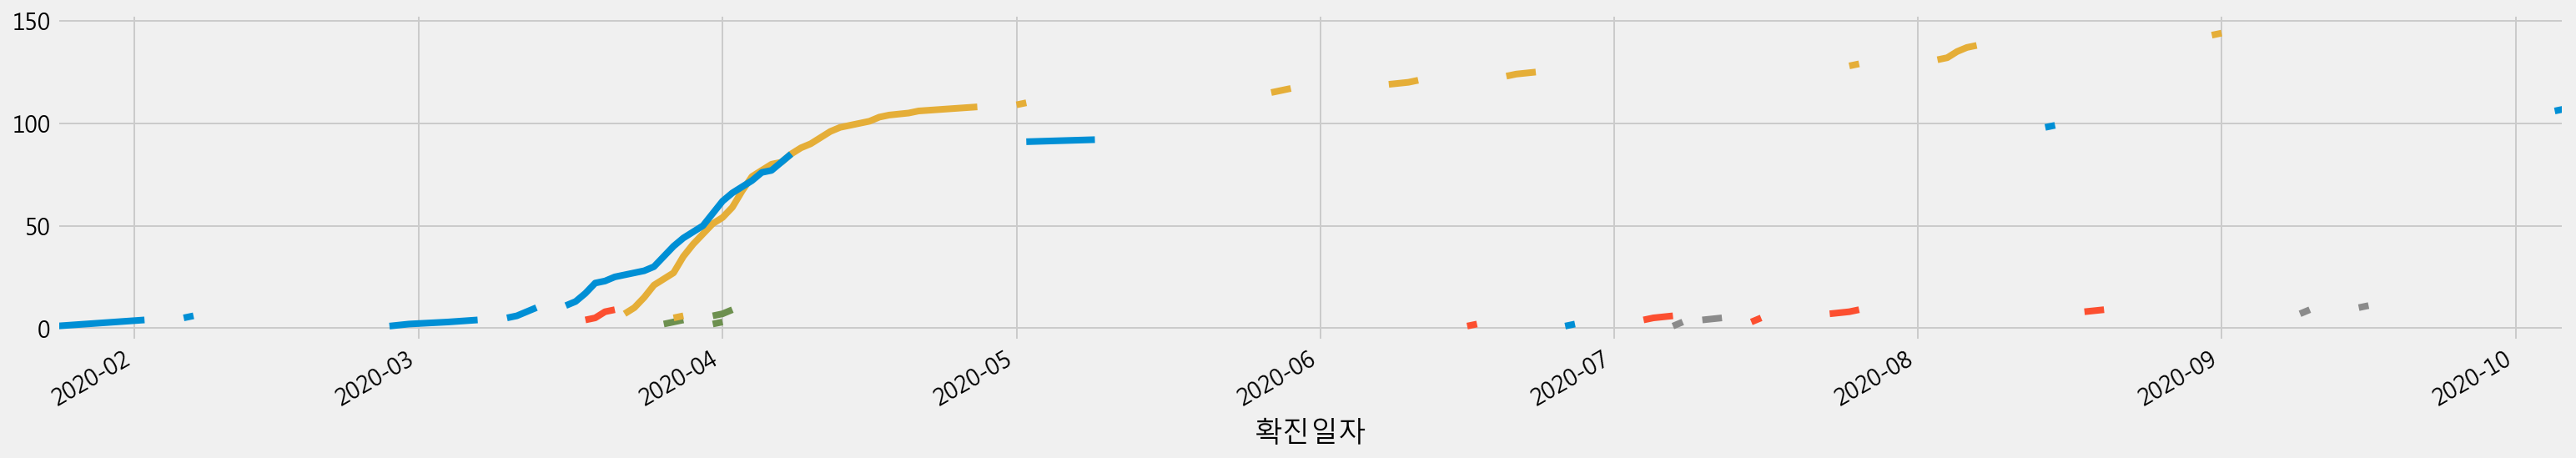

In [390]:
df_day_oversea.pivot(columns="해외").plot(figsize=(24, 4), legend=False)

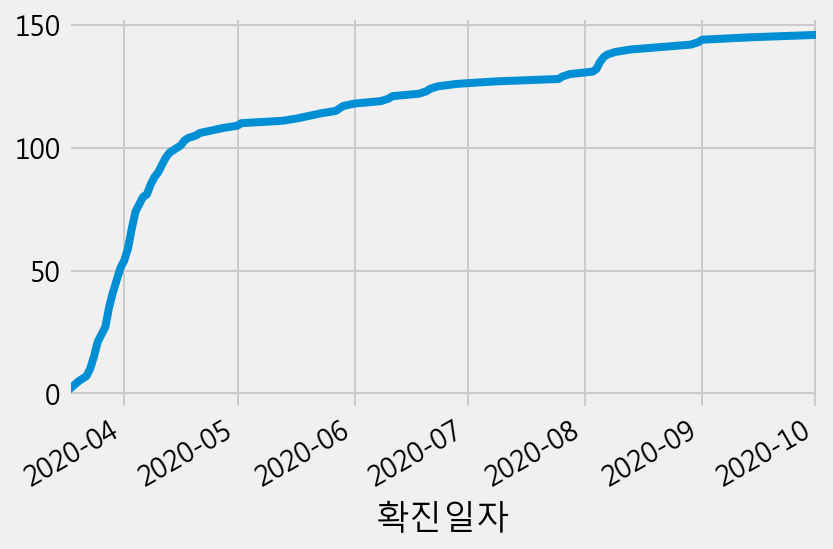

In [391]:
df_day_oversea.loc[df_day_oversea["해외"] == "미국", "누적확진수"].plot()

In [392]:
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

타지역    48
강남구    46
동작구    26
서초구    25
용산구    25
Name: 지역, dtype: int64

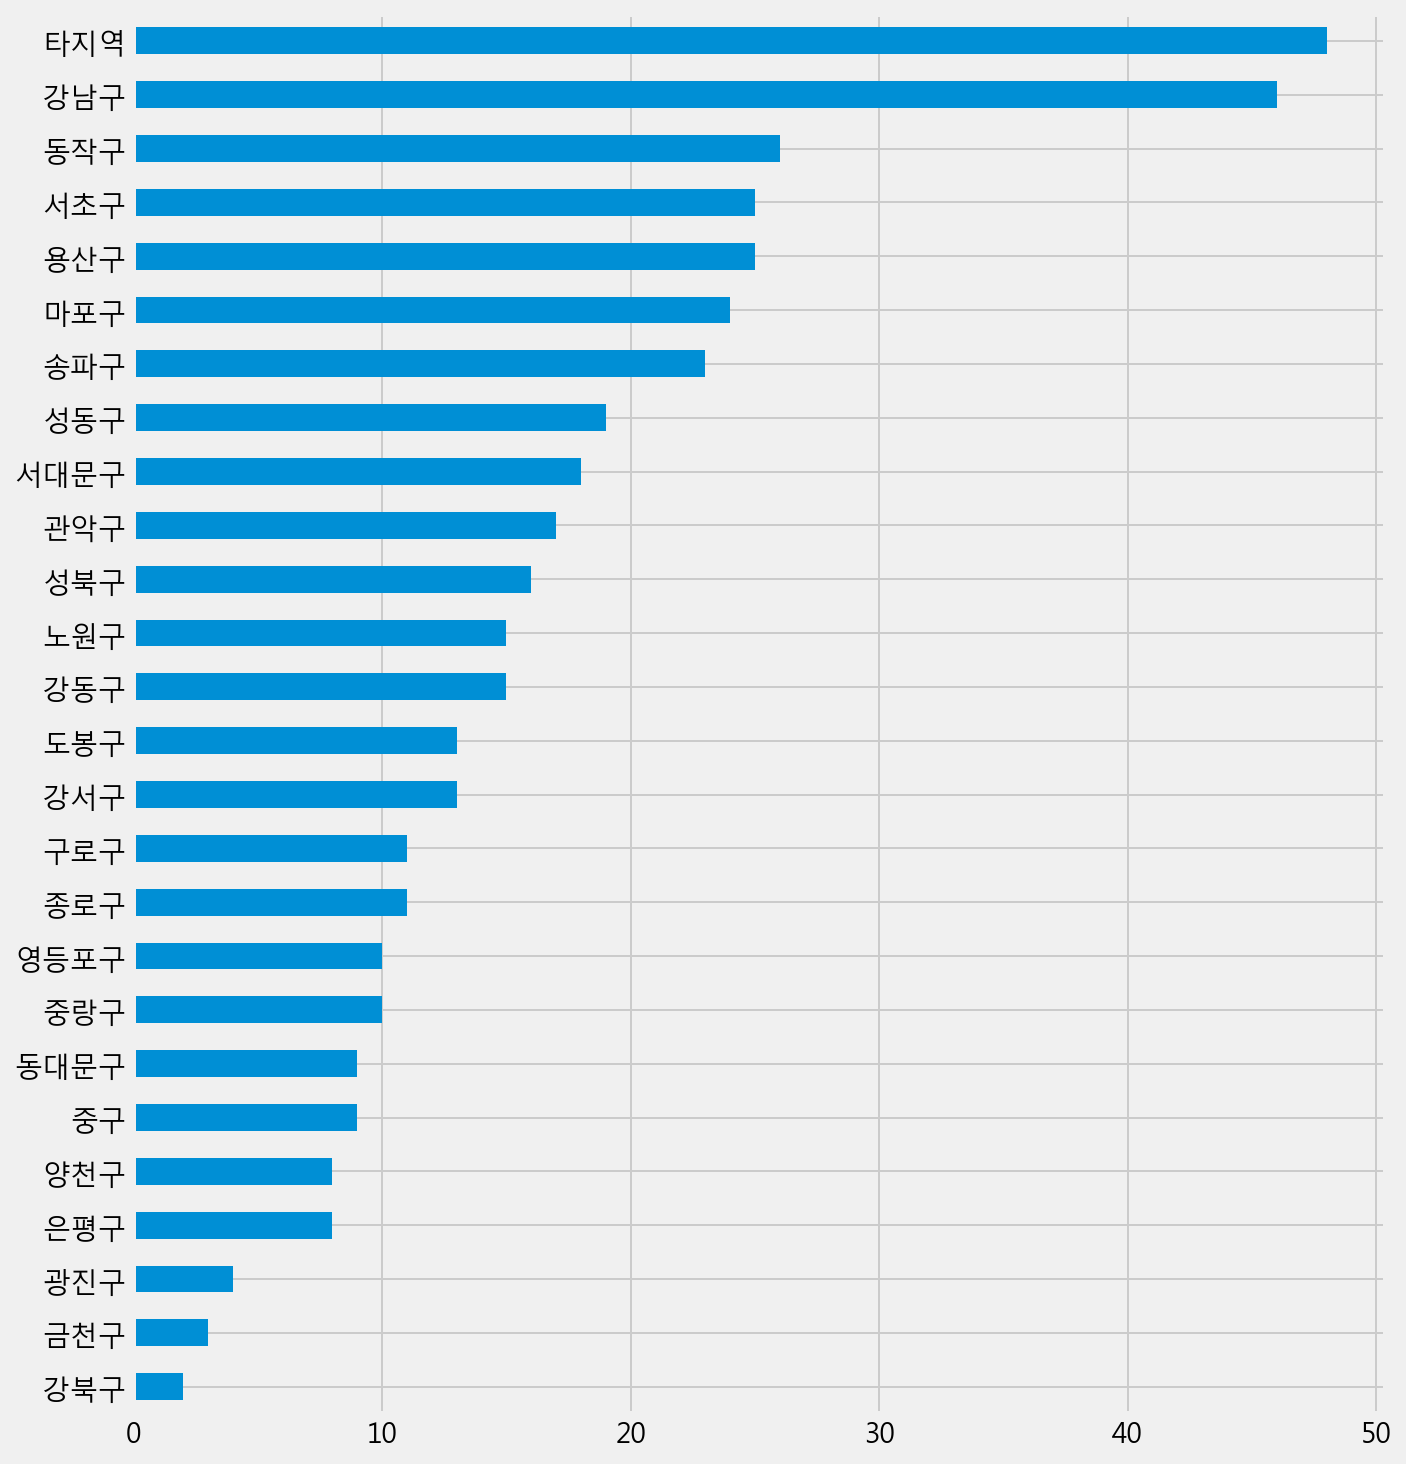

In [393]:
# "해외유입 구별 확진자" 시각화 하기

oversea_count_gu.sort_values().plot.barh(figsize=(10, 12))

### 전체확진수와 해외유입 확진수 비교

In [394]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df["지역"].value_counts()
all_count_gu

타지역     408
관악구     407
송파구     341
성북구     334
노원구     309
강서구     287
강남구     273
은평구     251
동작구     244
도봉구     209
서초구     200
영등포구    195
중랑구     193
구로구     187
강동구     187
양천구     181
마포구     168
동대문구    164
강북구     151
광진구     133
용산구     127
서대문구    127
성동구     124
금천구      95
종로구      89
중구       59
Name: 지역, dtype: int64

In [395]:
# 데이터프레임으로 변환하고 컬럼명 변경하기

df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu

,전체확진수
타지역,408
관악구,407
송파구,341
성북구,334
노원구,309
강서구,287
강남구,273
은평구,251
동작구,244
도봉구,209


In [396]:
# 해외유입확진수 구하기

df_oversea_gu = pd.DataFrame({"해외유입확진수" : oversea_count_gu})
df_oversea_gu

,해외유입확진수
타지역,48
강남구,46
동작구,26
서초구,25
용산구,25
마포구,24
송파구,23
성동구,19
서대문구,18
관악구,17


### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [397]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기

df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
타지역,408,48
관악구,407,17
송파구,341,23
성북구,334,16
노원구,309,15


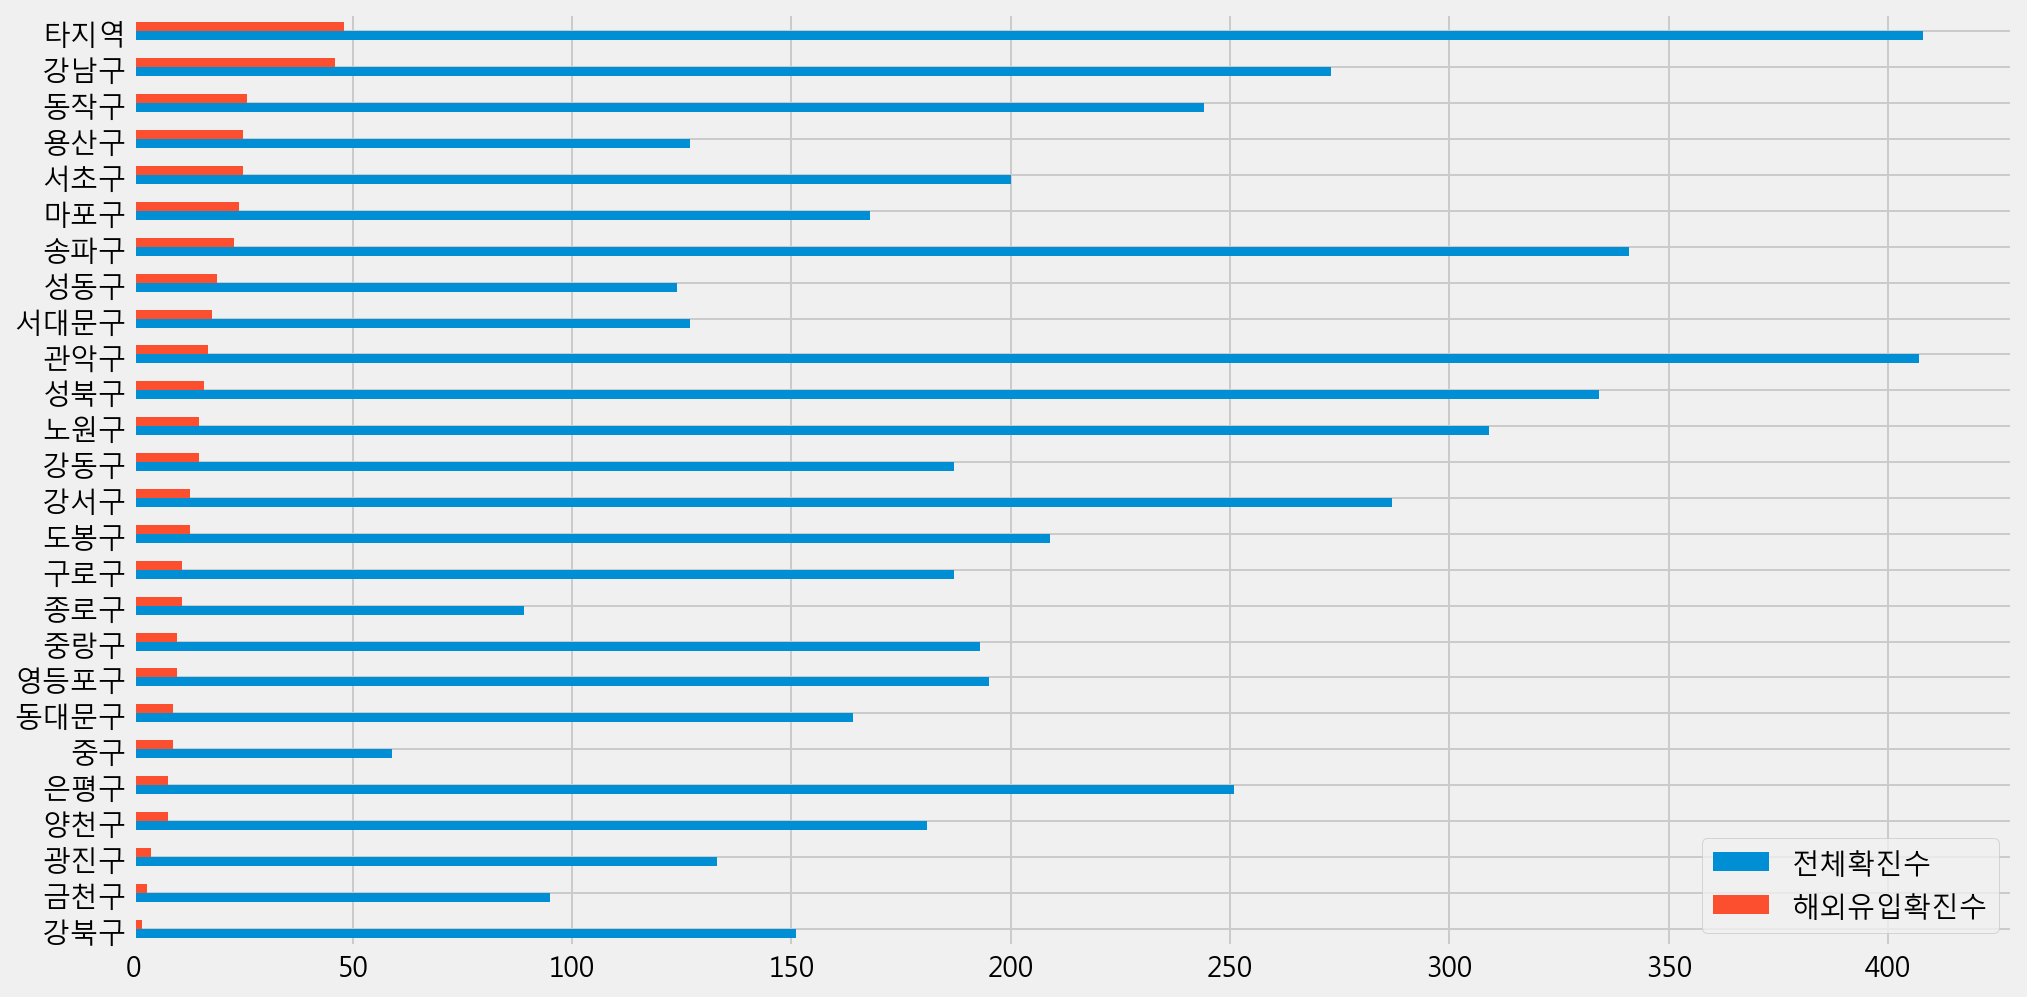

In [398]:
# 시각화 하기

df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(figsize=(15, 8))

In [399]:
# df_all_oversea_case["해외유입비율"] 구하기

df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"]) * 100
df_all_oversea_case.sort_values(by="해외유입비율", ascending=False).head(10)

,전체확진수,해외유입확진수,해외유입비율
용산구,127,25,19.685039
강남구,273,46,16.849817
성동구,124,19,15.322581
중구,59,9,15.254237
마포구,168,24,14.285714
서대문구,127,18,14.173228
서초구,200,25,12.500000
종로구,89,11,12.359551
타지역,408,48,11.764706
동작구,244,26,10.655738


### 월별 해외 확진자 수

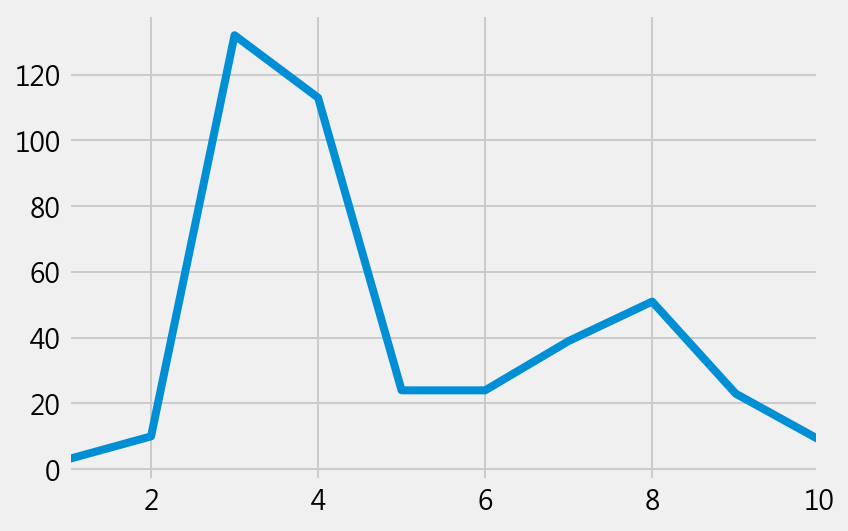

In [400]:
oversea_monthly_case = df_oversea["월"].value_counts()
oversea_monthly_case.sort_index().plot()

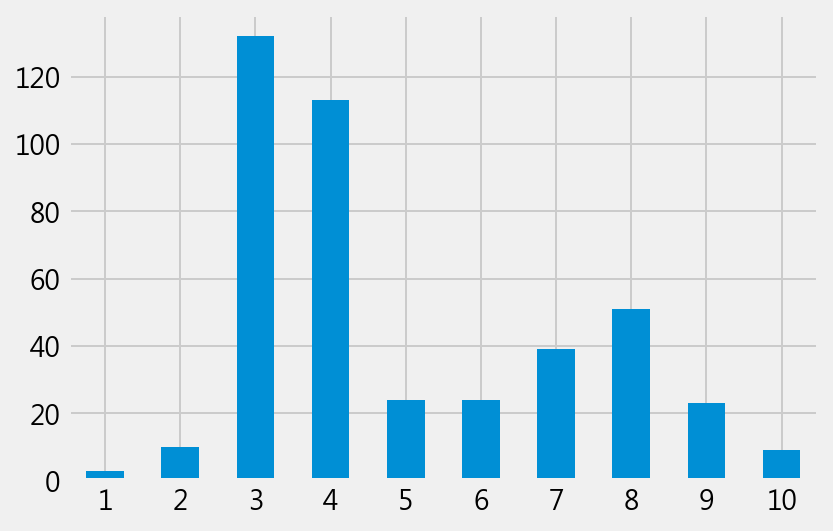

In [401]:
oversea_monthly_case.sort_index().plot.bar(rot=0)

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### 1. groupby 로 빈도수 구하기

In [402]:
month_gu = df_oversea.groupby(["월", "지역"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap="Greens")

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


#### crosstab 으로 빈도수 구하기

In [403]:
month_gu2 = pd.crosstab(df_oversea["월"], df_oversea["지역"])
month_gu2.style.bar()
month_gu2.style.background_gradient(cmap="Blues")

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


#### pivot_table 로 빈도수 구하기

In [404]:
pd.options.display.max_columns = 30

In [405]:
month_gu = pd.pivot_table(df_oversea, index="월", columns="지역", values="연번", 
               aggfunc="count", fill_value=0)
month_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


### 해외유입이 많은 지역(구)

In [406]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
top_oversea_gu = df_oversea["지역"].value_counts().head().index

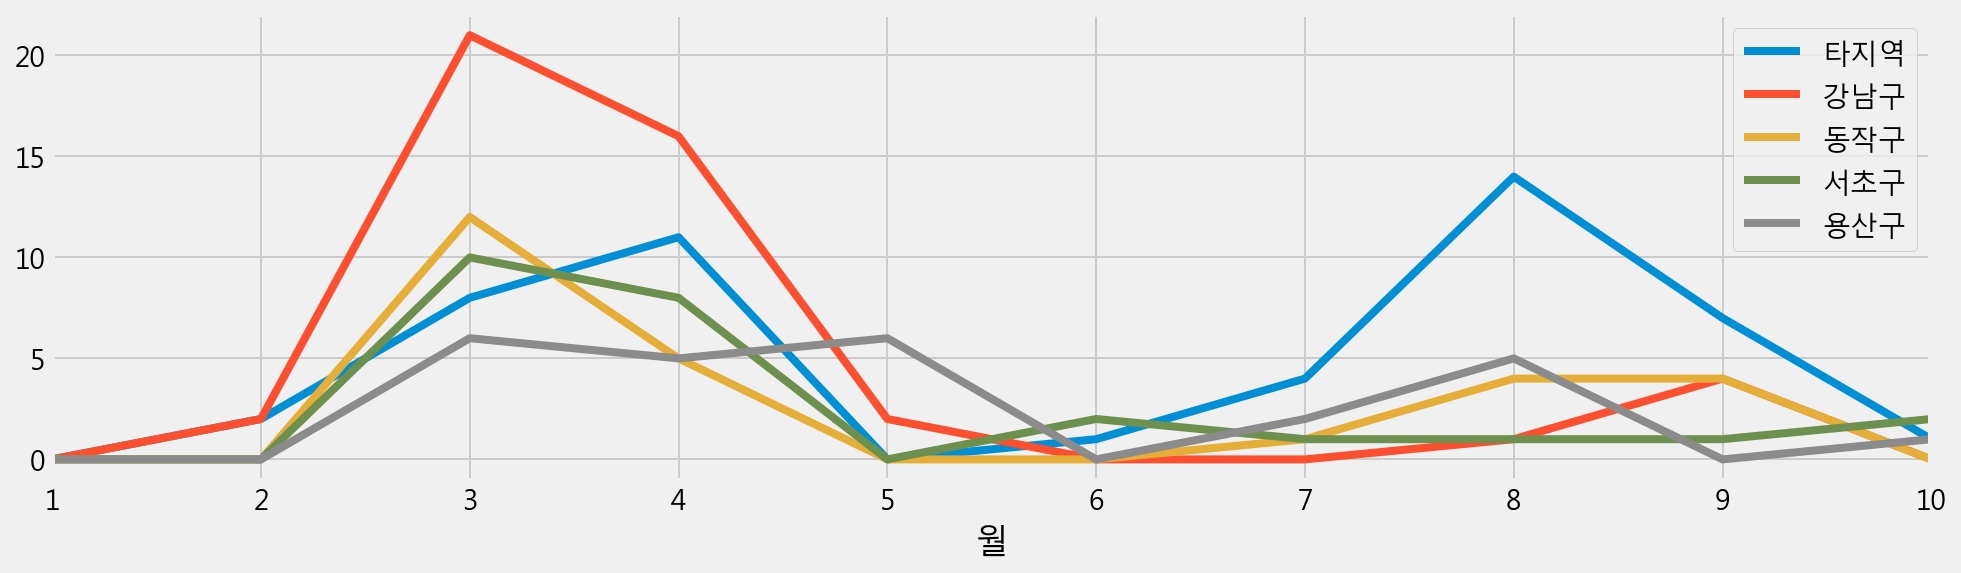

In [407]:
# 시각화 하기
g = month_gu[top_oversea_gu].plot(figsize=(15, 4))
g.legend(loc=1)

### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

In [408]:
group_oversea_gu = df_oversea.groupby(["해외", "지역"])["연번"].count().unstack()
group_oversea_gu.fillna(0).astype(int)

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
남미,4,0,0,0,1,0,0,0,1,0,1,1,3,2,0,0,0,2,0,0,2,0,0,1,0,4
네팔,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
러시아,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0
말레이시아,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
몰타,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,26,3,1,5,4,1,7,1,2,6,3,7,4,4,13,10,10,8,2,1,7,2,2,1,4,12


#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

In [409]:
group_oversea_gu2 = df_oversea.pivot_table(index="해외", columns="지역", values="연번", 
                       aggfunc="count")
group_oversea_gu2.style.background_gradient()

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
UAE,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,1,nan,nan,nan,1,1,nan,nan,nan,nan,nan,1,nan
나이지리아,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan
남미,4,nan,nan,nan,1,nan,nan,nan,1,nan,1,1,3,2,nan,nan,nan,2,nan,nan,2,nan,nan,1,nan,4
네팔,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3
러시아,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,1,nan
말레이시아,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
몰타,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
미국,26,3,1,5,4,1,7,1,2,6,3,7,4,4,13,10,10,8,2,1,7,2,2,1,4,12


#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [410]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?

group_oversea_gu.loc[["미국", "유럽", "남미", "중국"], ["강남구", "서초구", "송파구"]]

지역,강남구,서초구,송파구
해외,,,
미국,26.0,13.0,8.0
유럽,10.0,9.0,8.0
남미,4.0,NaN,2.0
중국,NaN,NaN,NaN


In [411]:
# top_oversea_gu 에 따른 확진수 보기
group_oversea_gu[top_oversea_gu]

지역,타지역,강남구,동작구,서초구,용산구
해외,,,,,
21263,NaN,NaN,NaN,NaN,NaN
UAE,NaN,NaN,NaN,NaN,NaN
나이지리아,NaN,NaN,NaN,NaN,NaN
남미,4.0,4.0,1.0,NaN,2.0
네팔,3.0,NaN,NaN,NaN,NaN
러시아,NaN,1.0,NaN,NaN,NaN
말레이시아,NaN,NaN,NaN,NaN,NaN
몰타,NaN,NaN,NaN,NaN,NaN
미국,12.0,26.0,7.0,13.0,7.0


In [412]:
group_oversea_gu[top_oversea_gu].dropna(how="all").fillna(0).astype(int)

지역,타지역,강남구,동작구,서초구,용산구
해외,,,,,
남미,4,4,1,0,2
네팔,3,0,0,0,0
러시아,0,1,0,0,0
미국,12,26,7,13,7
방글라데시,0,1,1,0,0
베트남,0,0,2,0,0
사우디아라비아,2,0,0,0,0
에콰도르,0,0,1,0,0
에티오피아,1,0,0,0,0
